In [21]:
import pandas as pd
import catboost as cb
import geodatasets
import geopandas as gpd
import seaborn as sns
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('earthquakes.csv')

In [3]:
df.time = pd.to_datetime(df.time)
df = df.loc[df.time >= "1994-01-01"]
df = df.sort_values("time")
df = df.set_index("time")

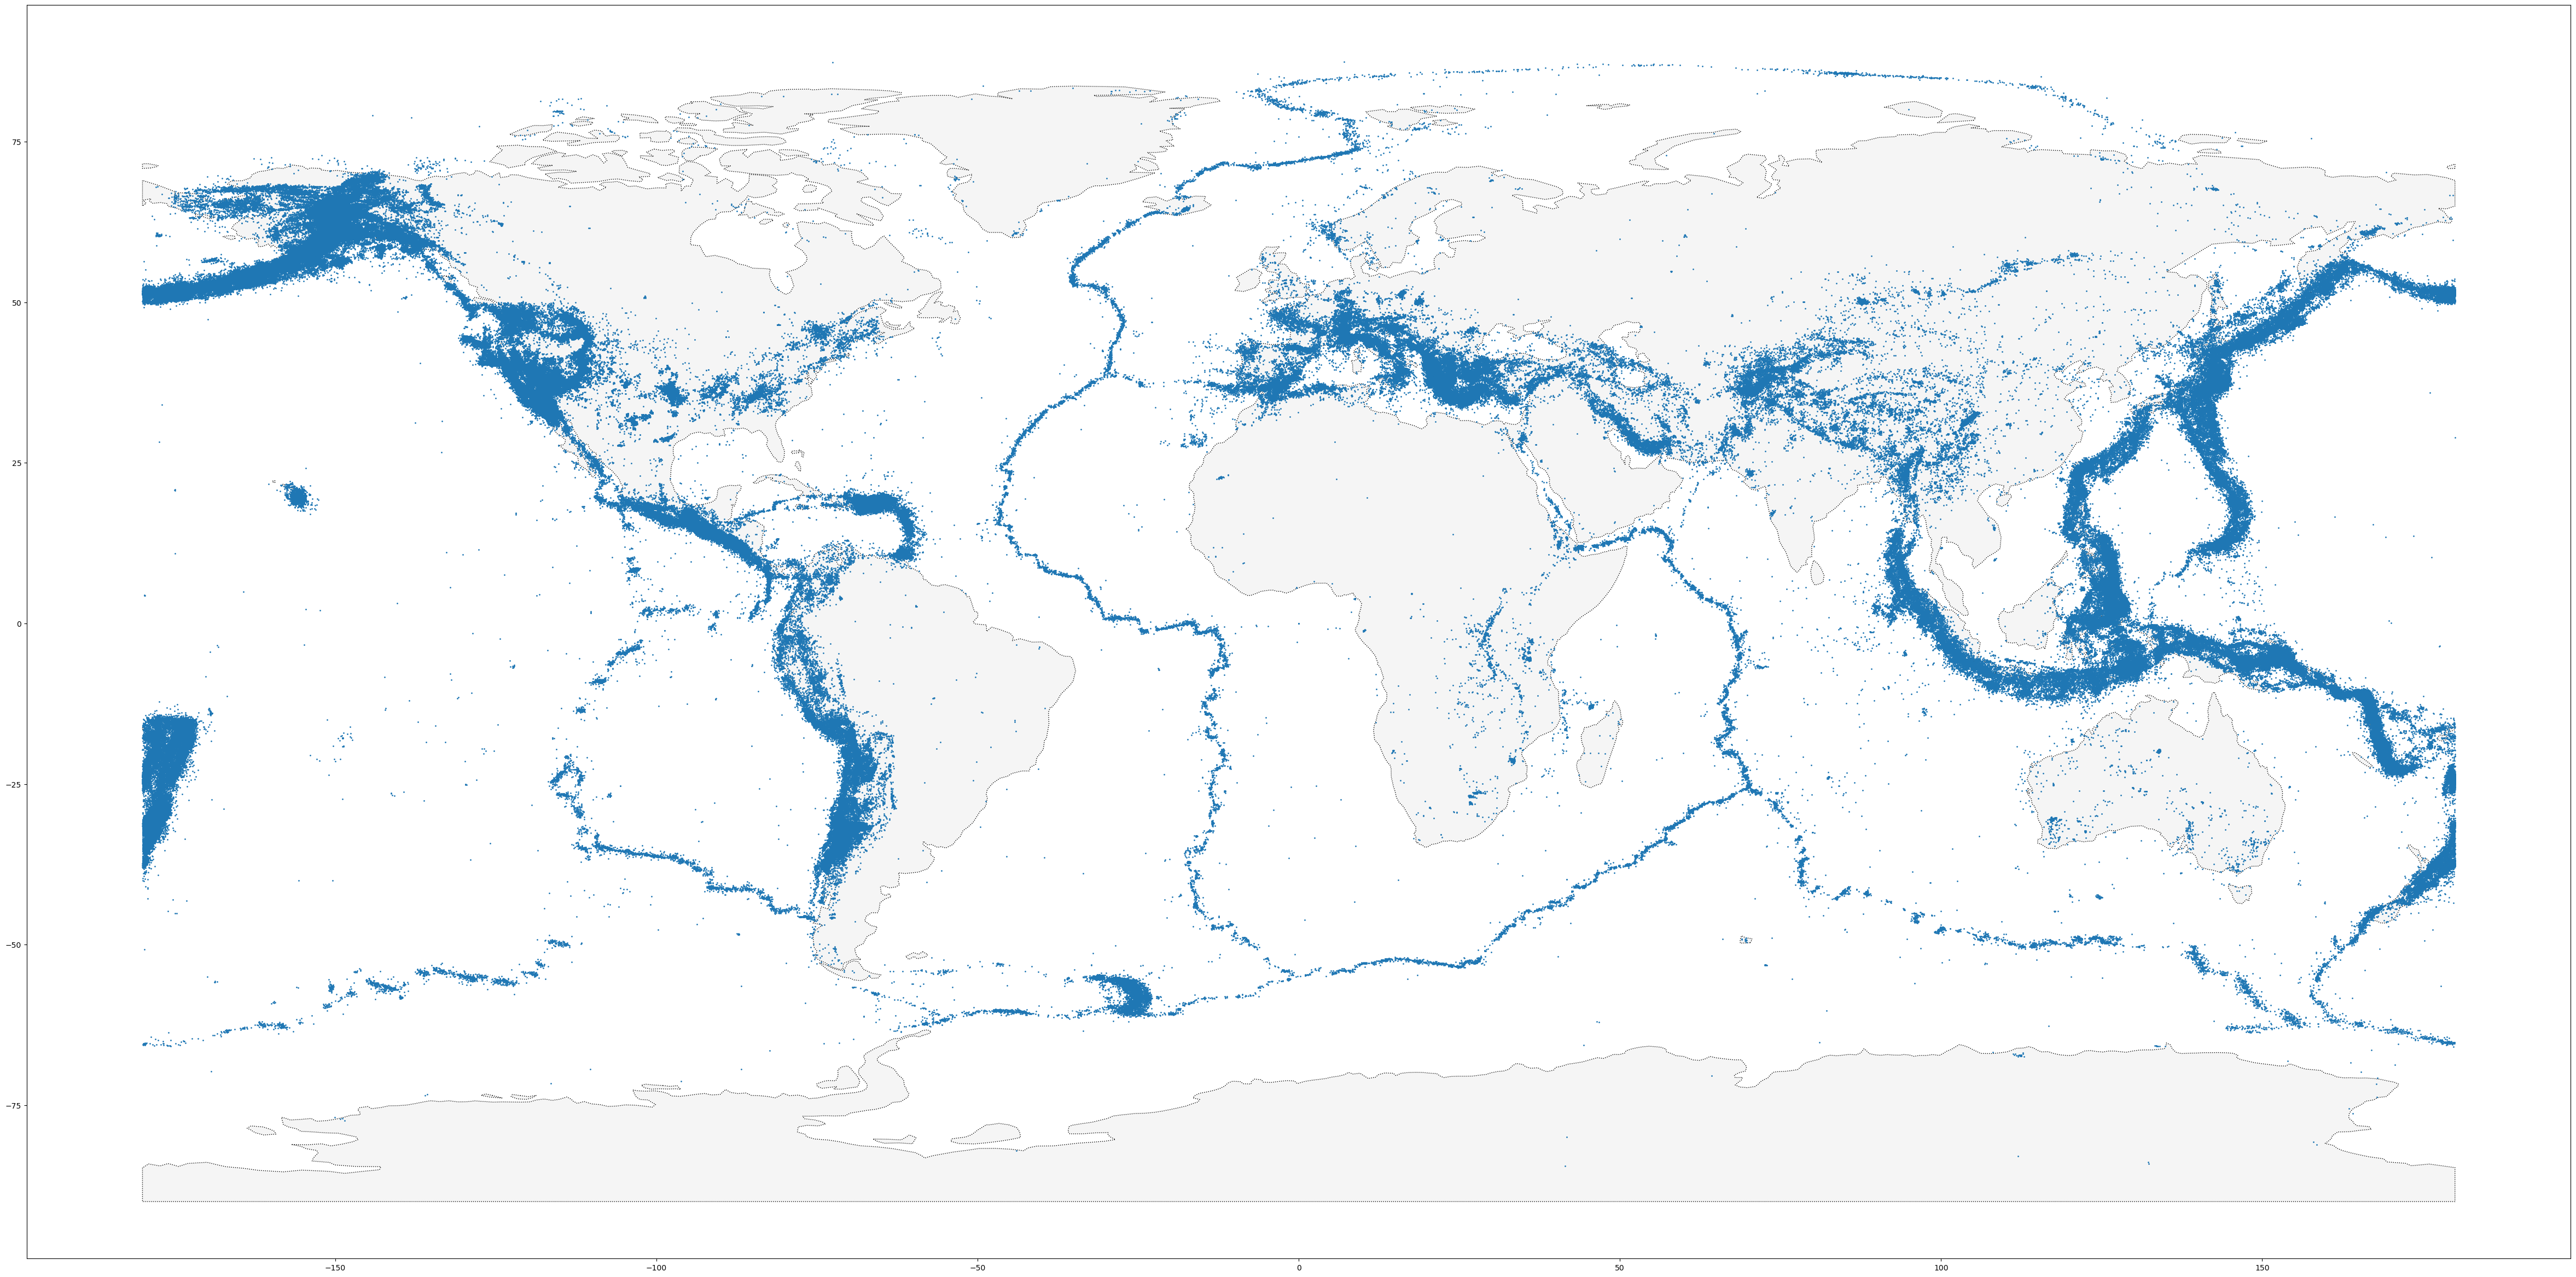

In [4]:
earthquakes = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df.longitude, df.latitude))
earthquakes.crs = 'EPSG:4326'

path = geodatasets.get_path('naturalearth.land')
world = gpd.read_file(path)

ax = world.plot(figsize=(60, 60), color='whitesmoke', linestyle=':', edgecolor='black')
earthquakes.to_crs(epsg=4326).plot(markersize=1, ax=ax)
plt.show()

In [5]:
df["region"] = df.place.str.split(", ", expand=True)[1]
df.region = df.region.fillna(df.place)
df.region = df.region.replace({"CA": "California", "B.C.": "Baja California"})

df = df[["depth", "mag", "region", "latitude", "longitude"]]

In [6]:
regions = df.region.value_counts()
top_k = 25
top_k_regions = regions.head(top_k).index
df = df.loc[df.region.isin(top_k_regions)]

df = df.groupby("region").resample("d").mean()
df = df.reset_index()
df.head()

region                      time      depth       mag   latitude  \
0  Alaska 1994-01-01 00:00:00+00:00  74.540000  3.100000  60.250980   
1  Alaska 1994-01-02 00:00:00+00:00  61.183333  2.366667  60.914383   
2  Alaska 1994-01-03 00:00:00+00:00  27.942857  1.990476  62.789643   
3  Alaska 1994-01-04 00:00:00+00:00  50.640000  2.393333  60.305067   
4  Alaska 1994-01-05 00:00:00+00:00  51.933333  2.538889  61.675750   

    longitude  
0 -152.811640  
1 -150.188400  
2 -149.244229  
3 -127.430487  
4 -151.244972

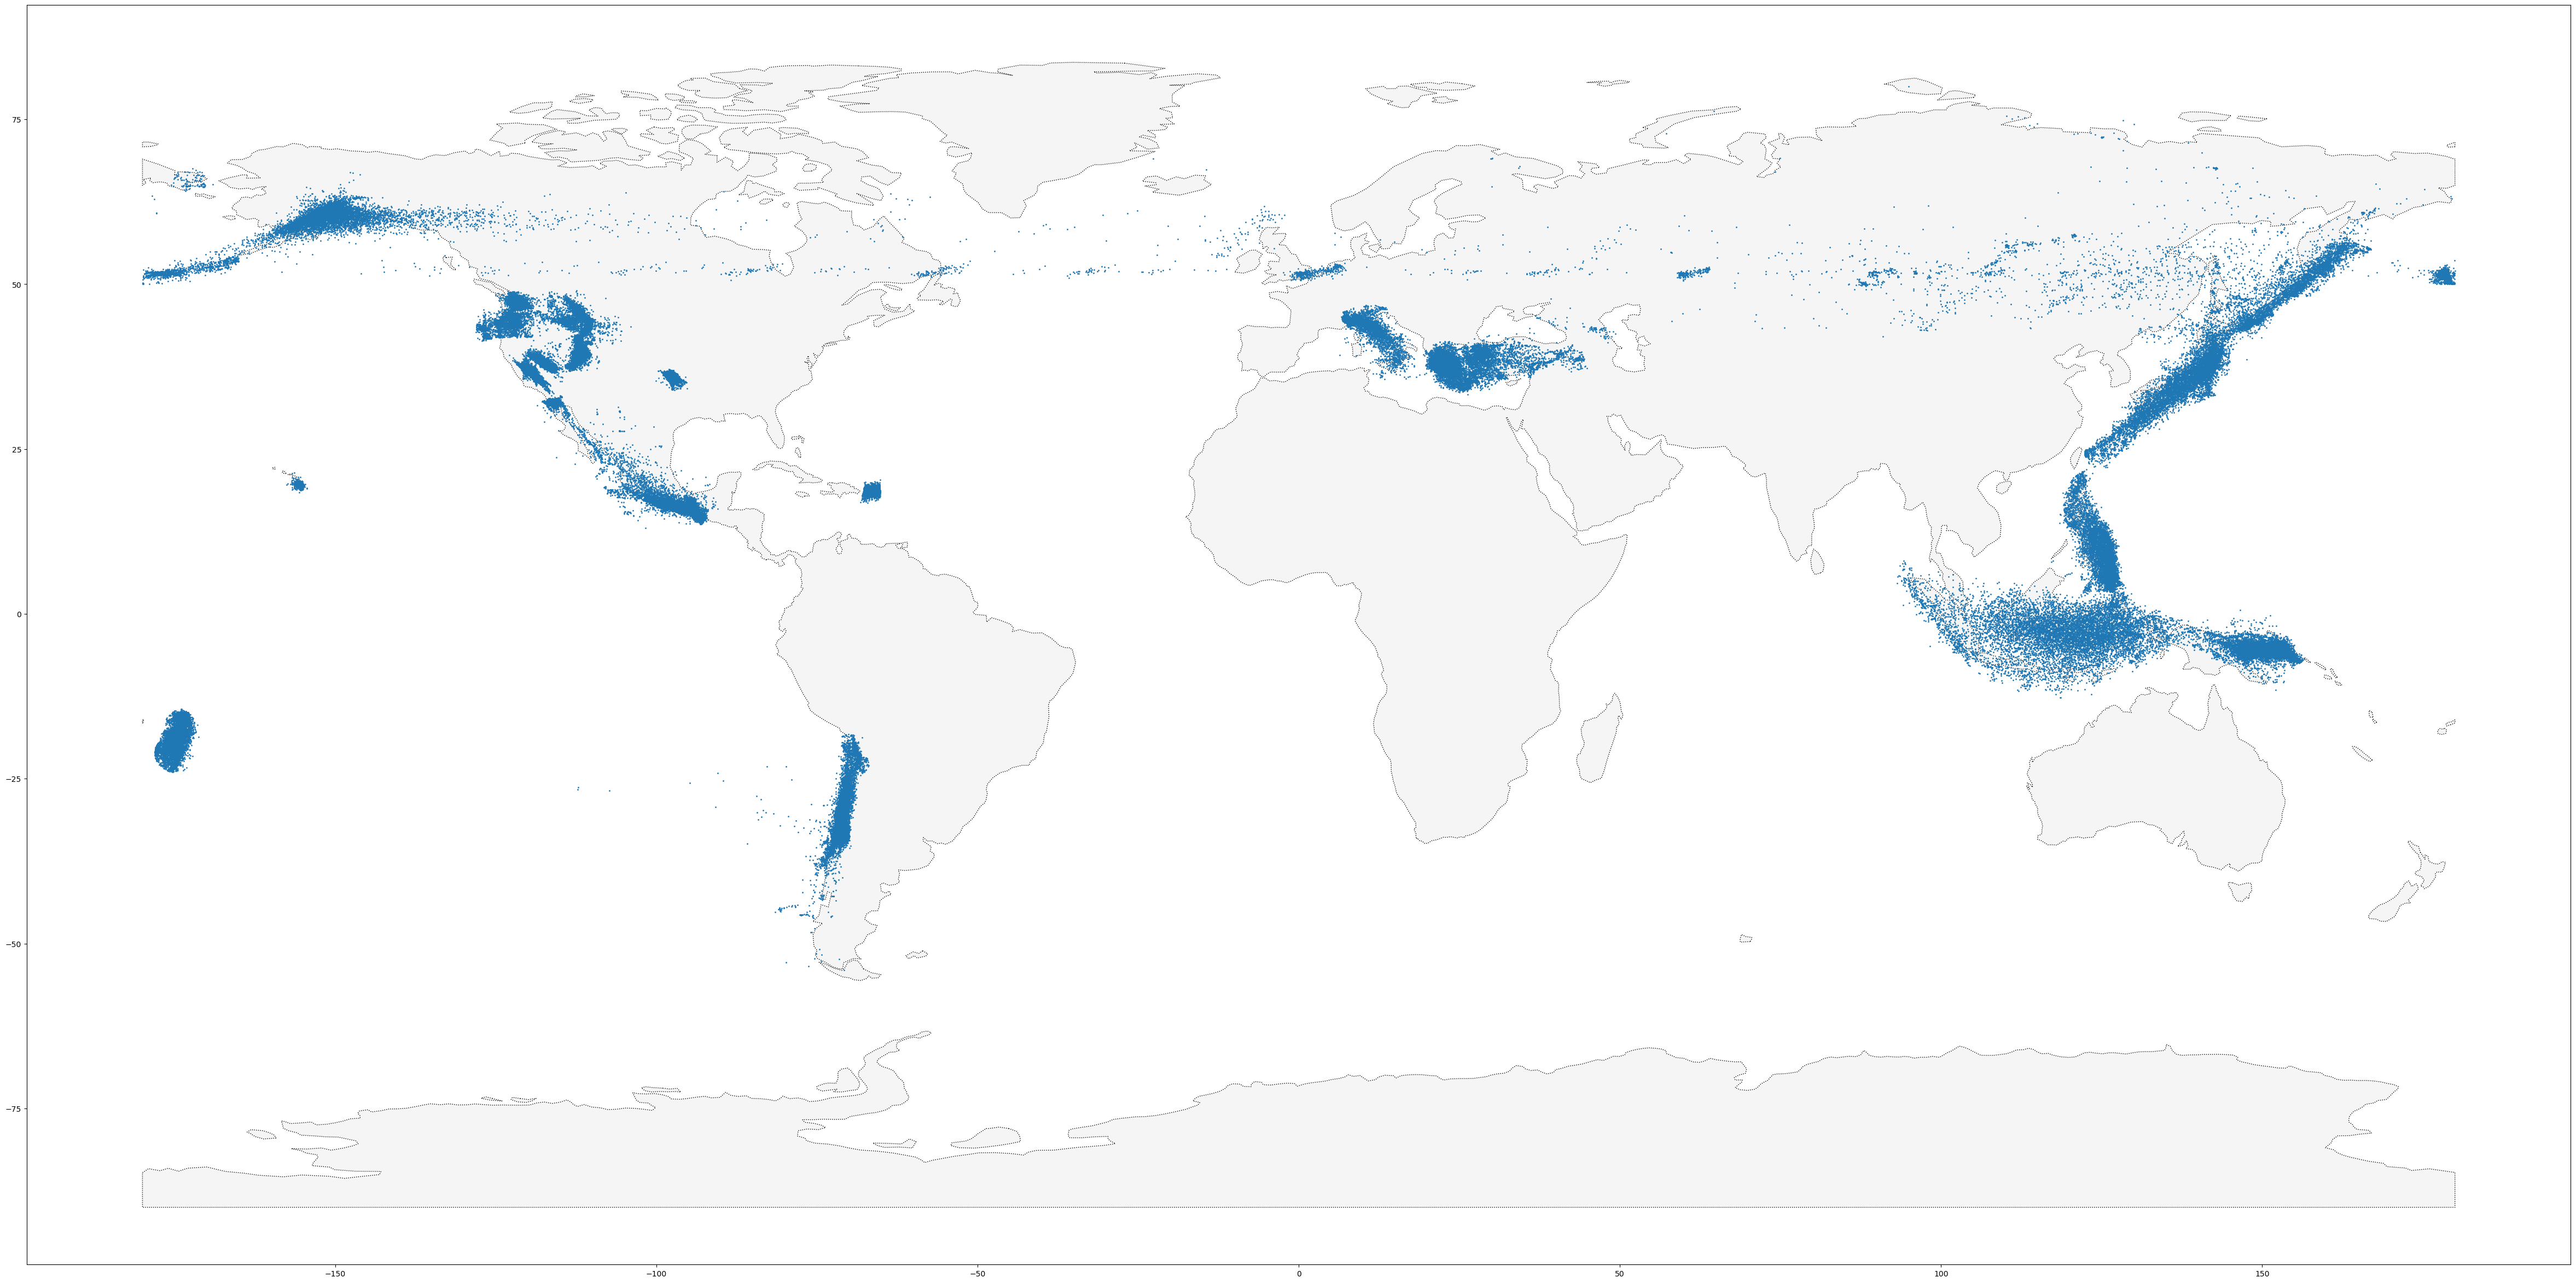

In [7]:
earthquakes = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df.longitude, df.latitude))
earthquakes.crs = 'EPSG:4326'

path = geodatasets.get_path('naturalearth.land')
world = gpd.read_file(path)

ax = world.plot(figsize=(60, 60), color='whitesmoke', linestyle=':', edgecolor='black')
earthquakes.to_crs(epsg=4326).plot(markersize=1, ax=ax)
plt.show()

In [8]:
df.mag = df.groupby('region').mag.ffill()
df.depth = df.groupby('region').depth.ffill()
df.latitude = df.groupby('region').latitude.ffill()
df.longitude = df.groupby('region').longitude.ffill()

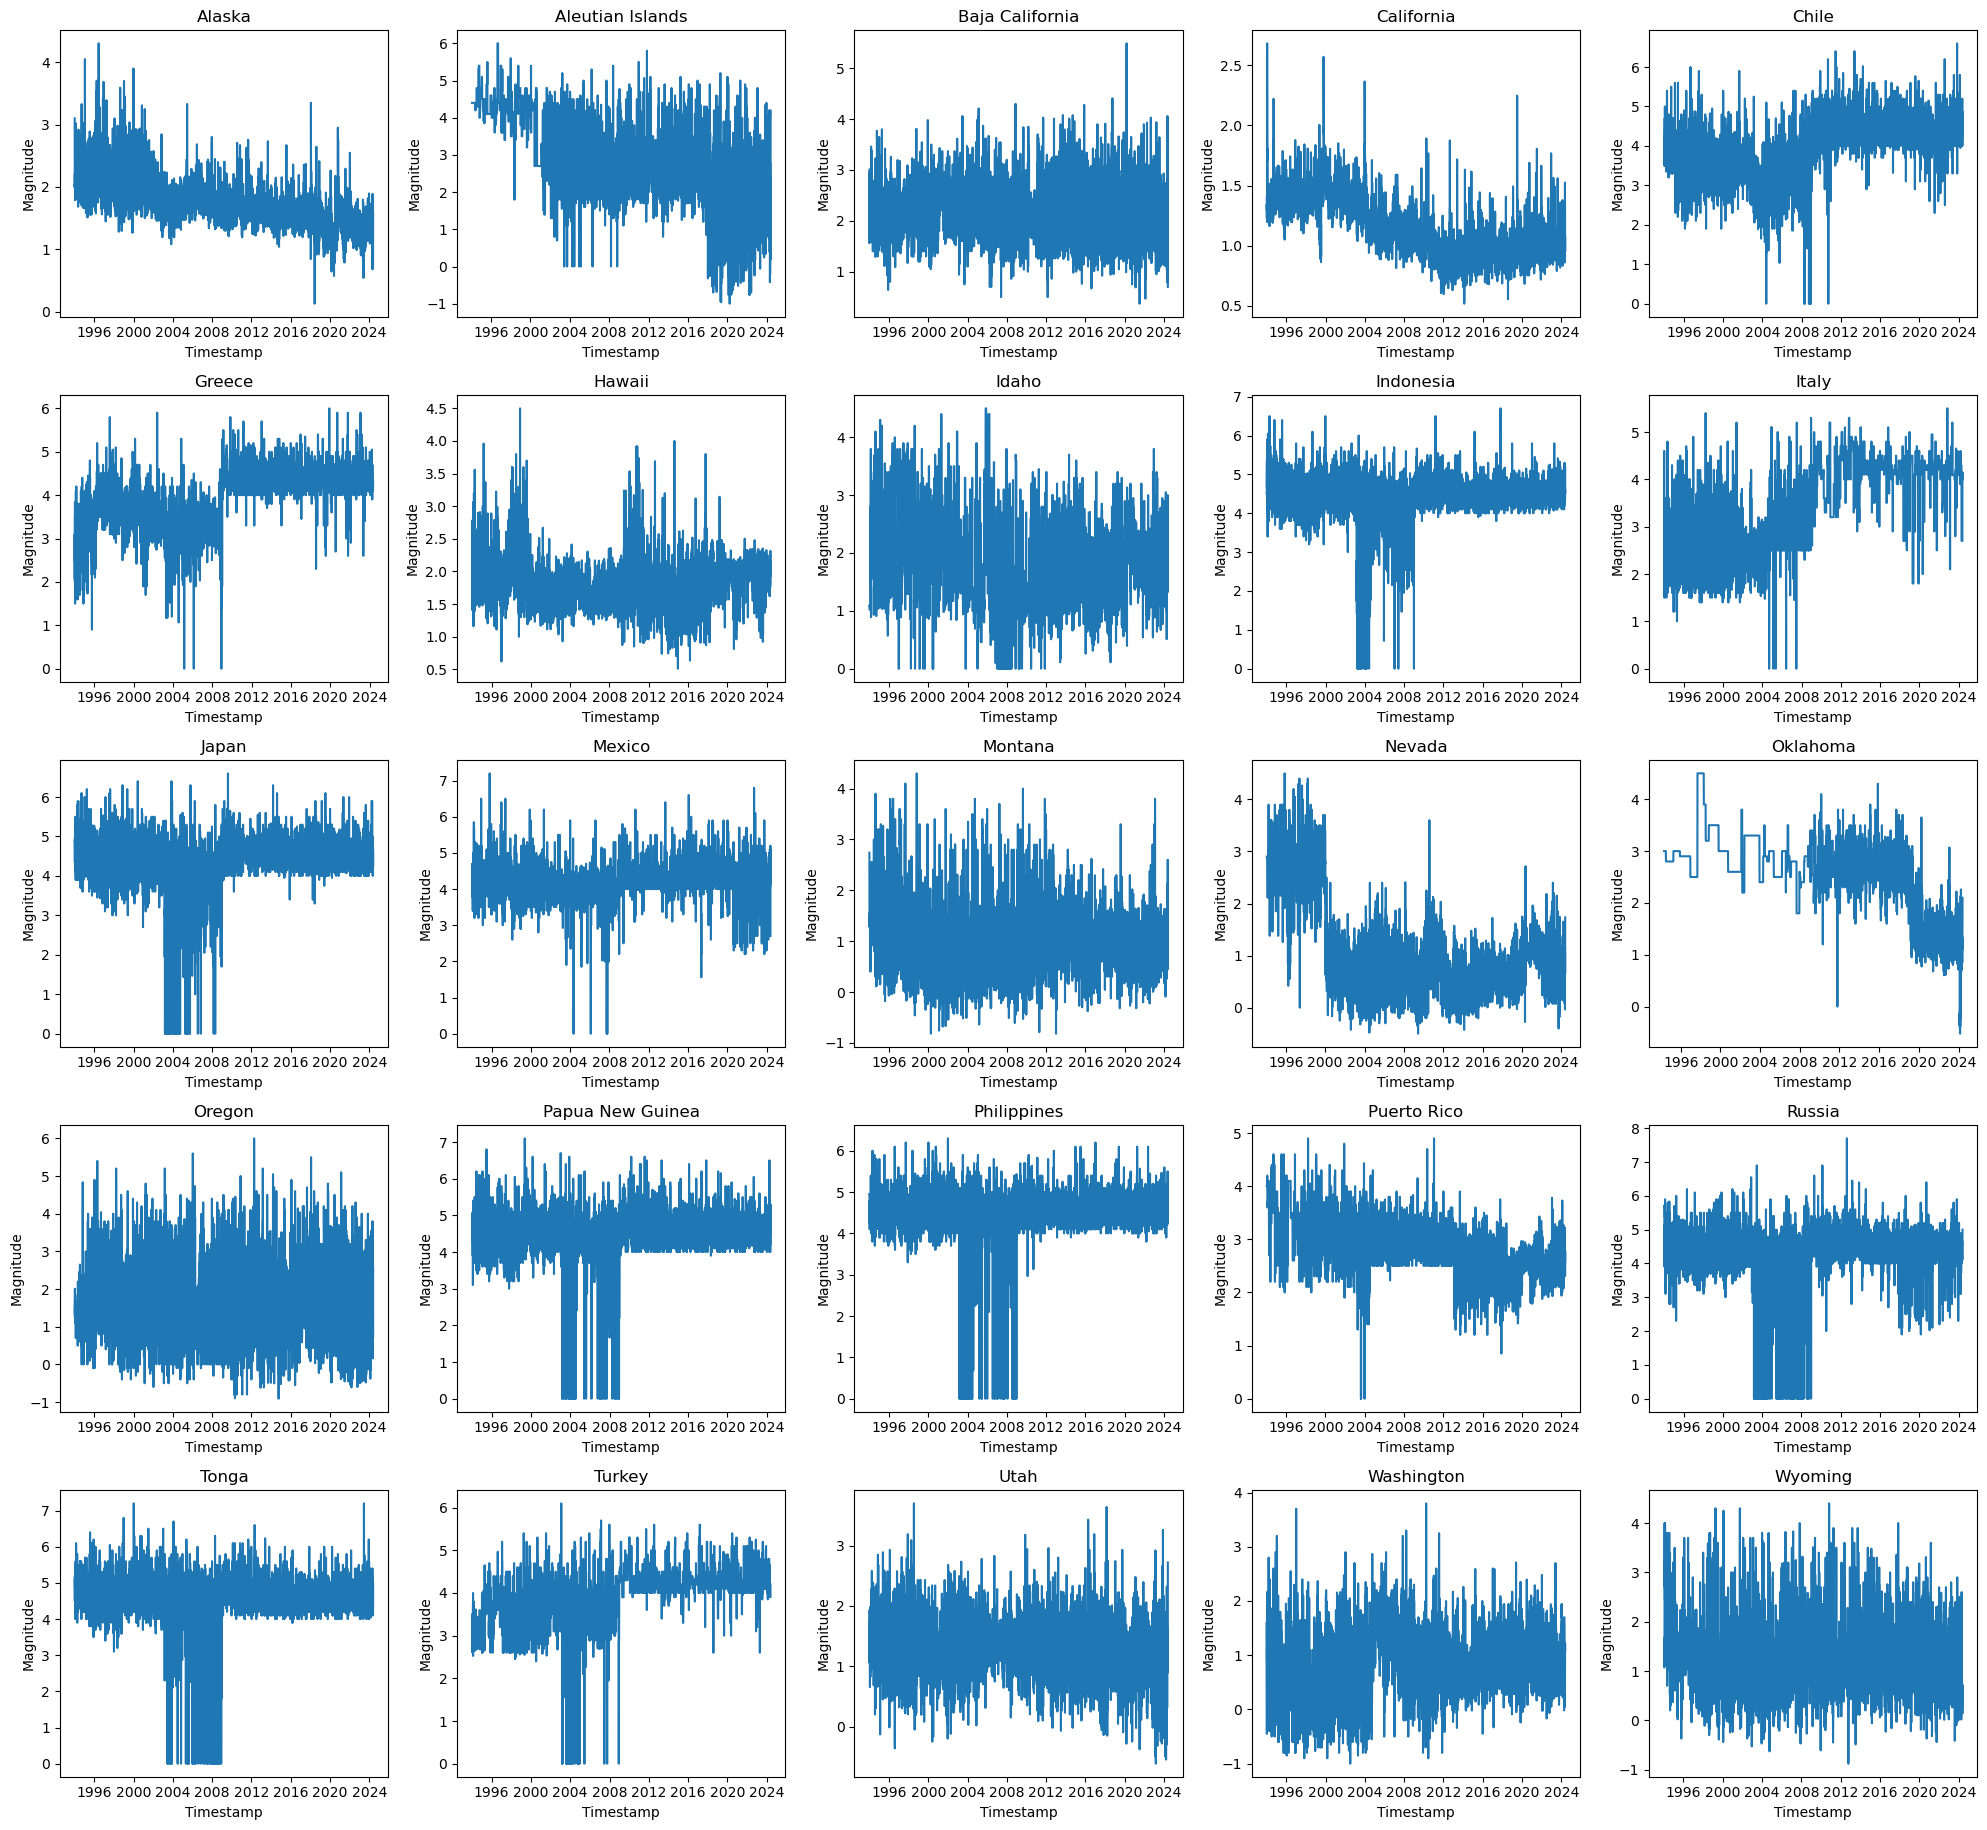

In [15]:
fig, axes = plt.subplots(5, 5, figsize=(20, 20), sharex=False, sharey=False)

regions = df['region'].unique()
for i, ax in enumerate(axes.flat):
    region_data = df[df['region'] == regions[i]]
    ax.plot(region_data['time'], region_data['mag'])
    ax.set_title(regions[i])
    ax.set_xlabel('Timestamp')
    ax.set_ylabel('Magnitude')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

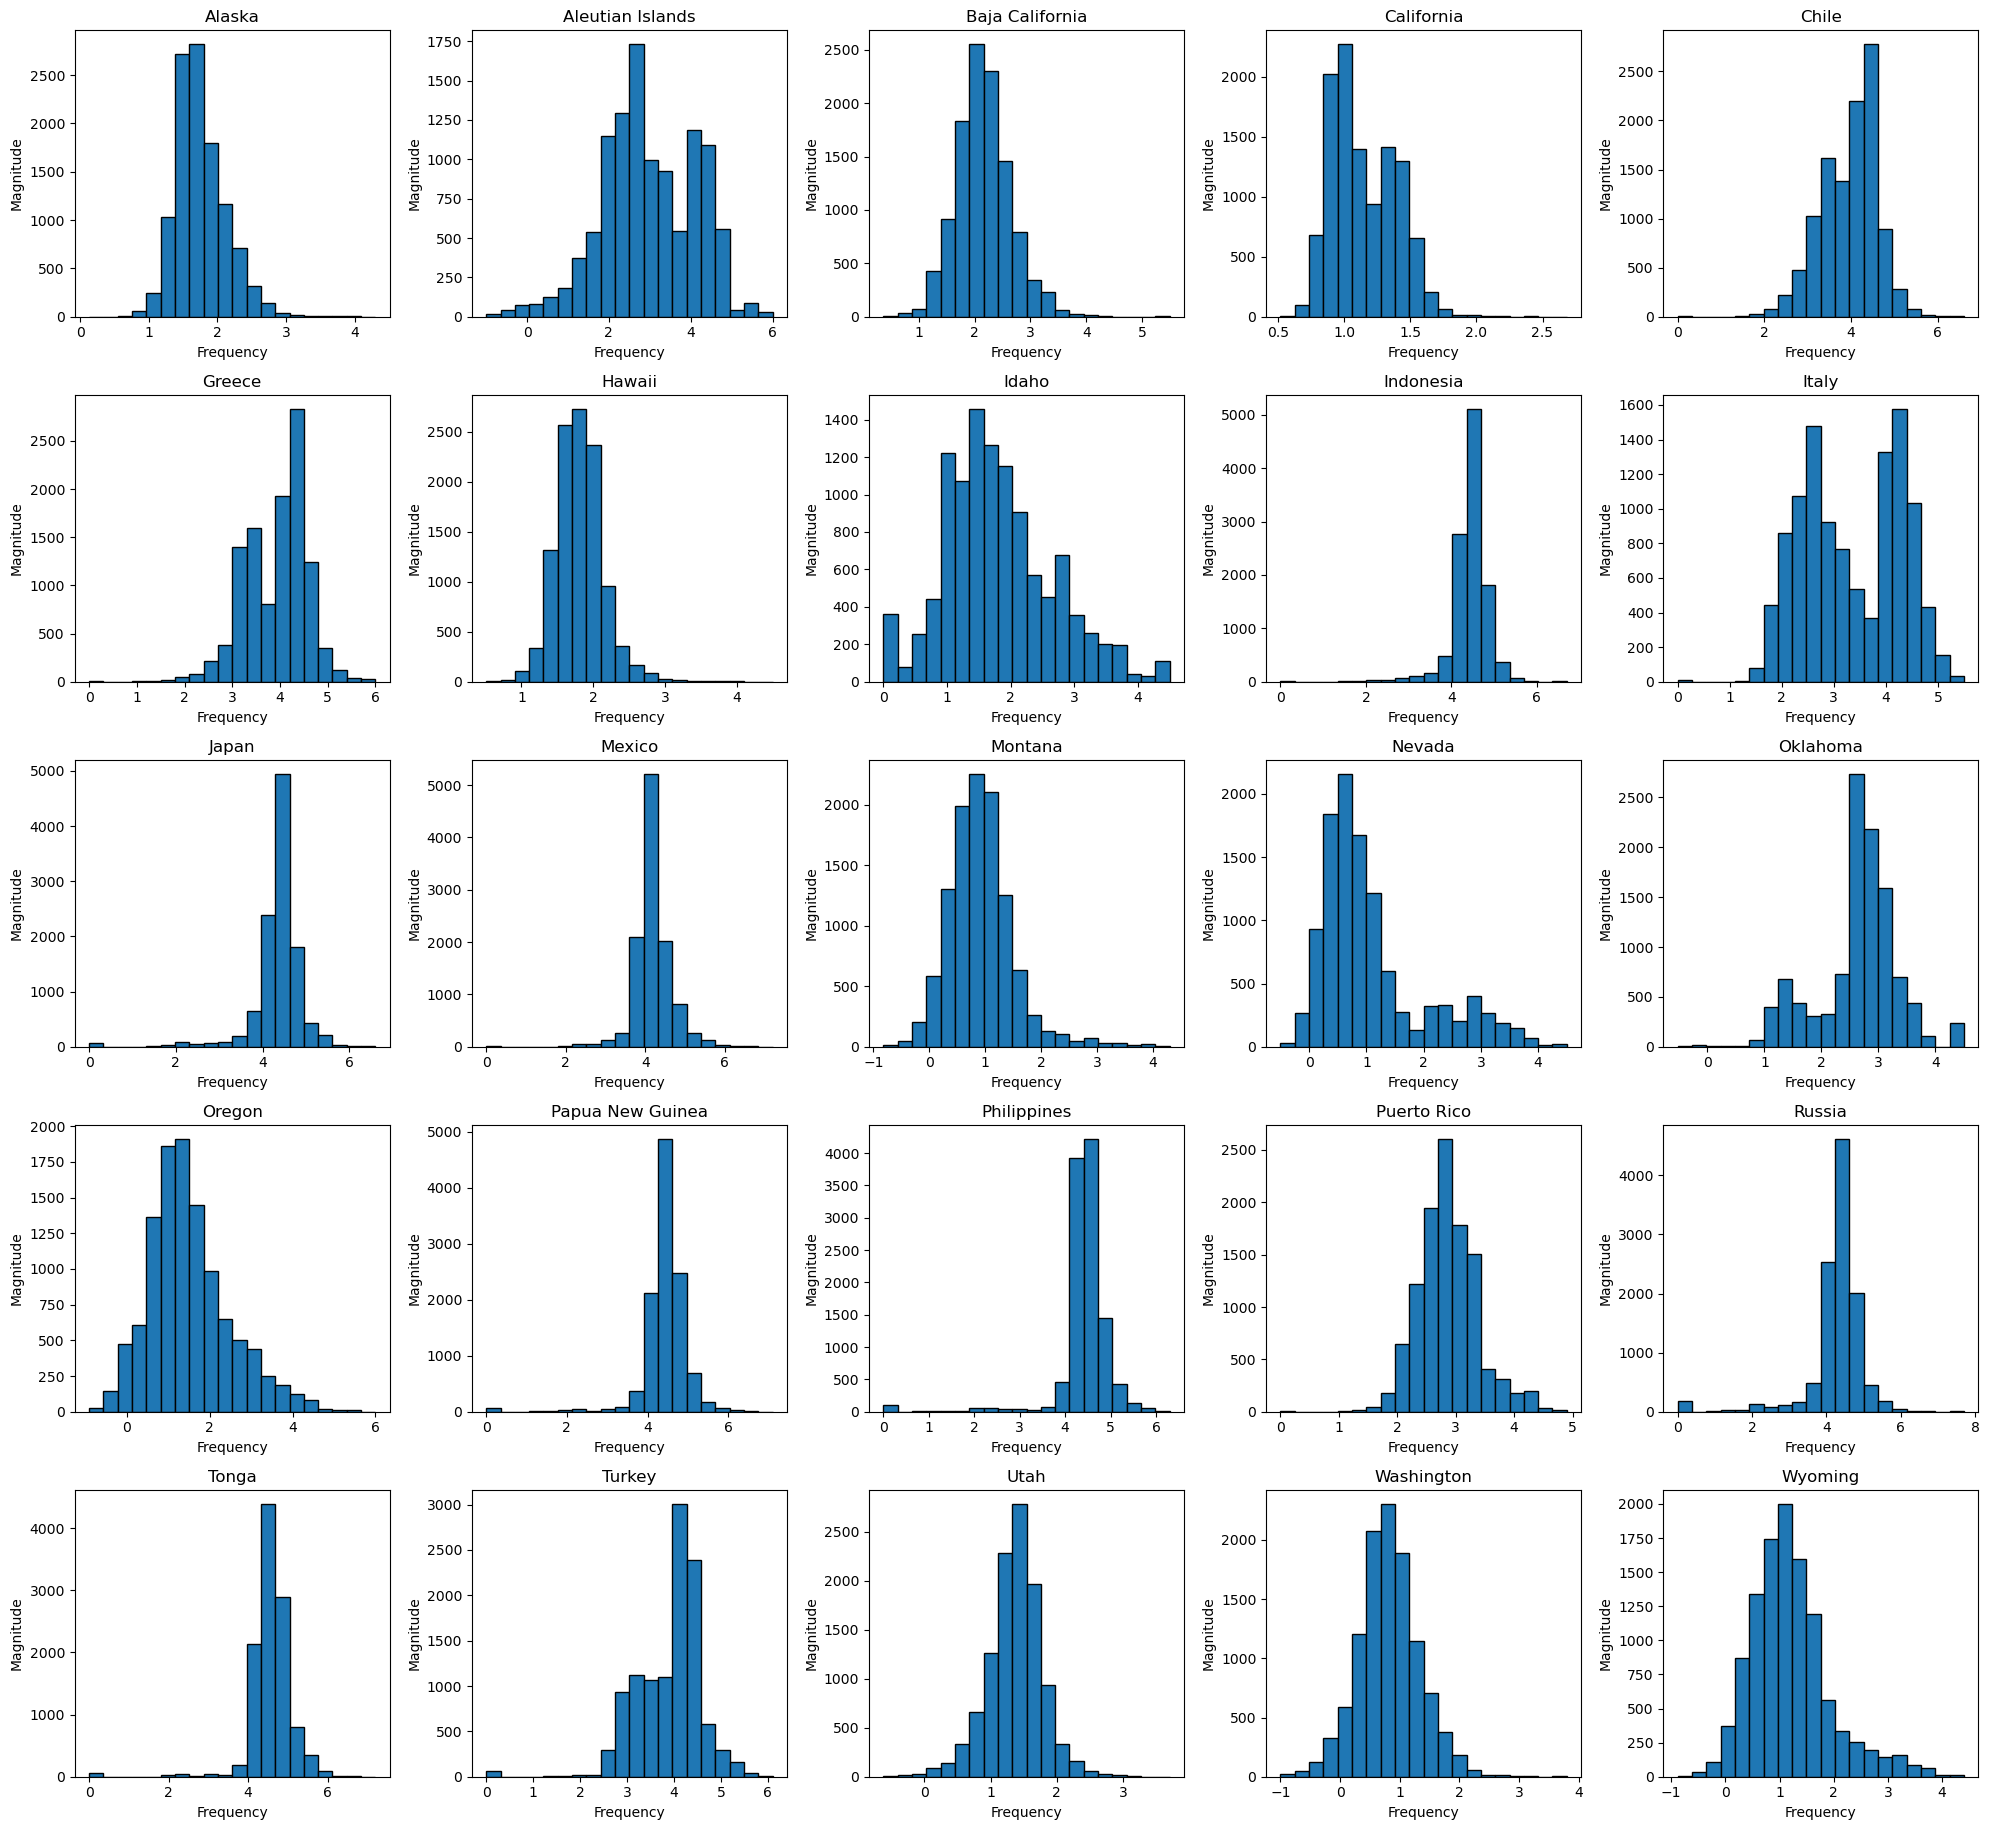

In [19]:
fig, axes = plt.subplots(5, 5, figsize=(20, 20), sharex=False, sharey=False)

regions = df['region'].unique()
for i, ax in enumerate(axes.flat):
    region_data = df[df['region'] == regions[i]]
    ax.hist(region_data['mag'], bins=20, edgecolor='black')
    ax.set_title(regions[i])
    ax.set_xlabel('Frequency')
    ax.set_ylabel('Magnitude')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

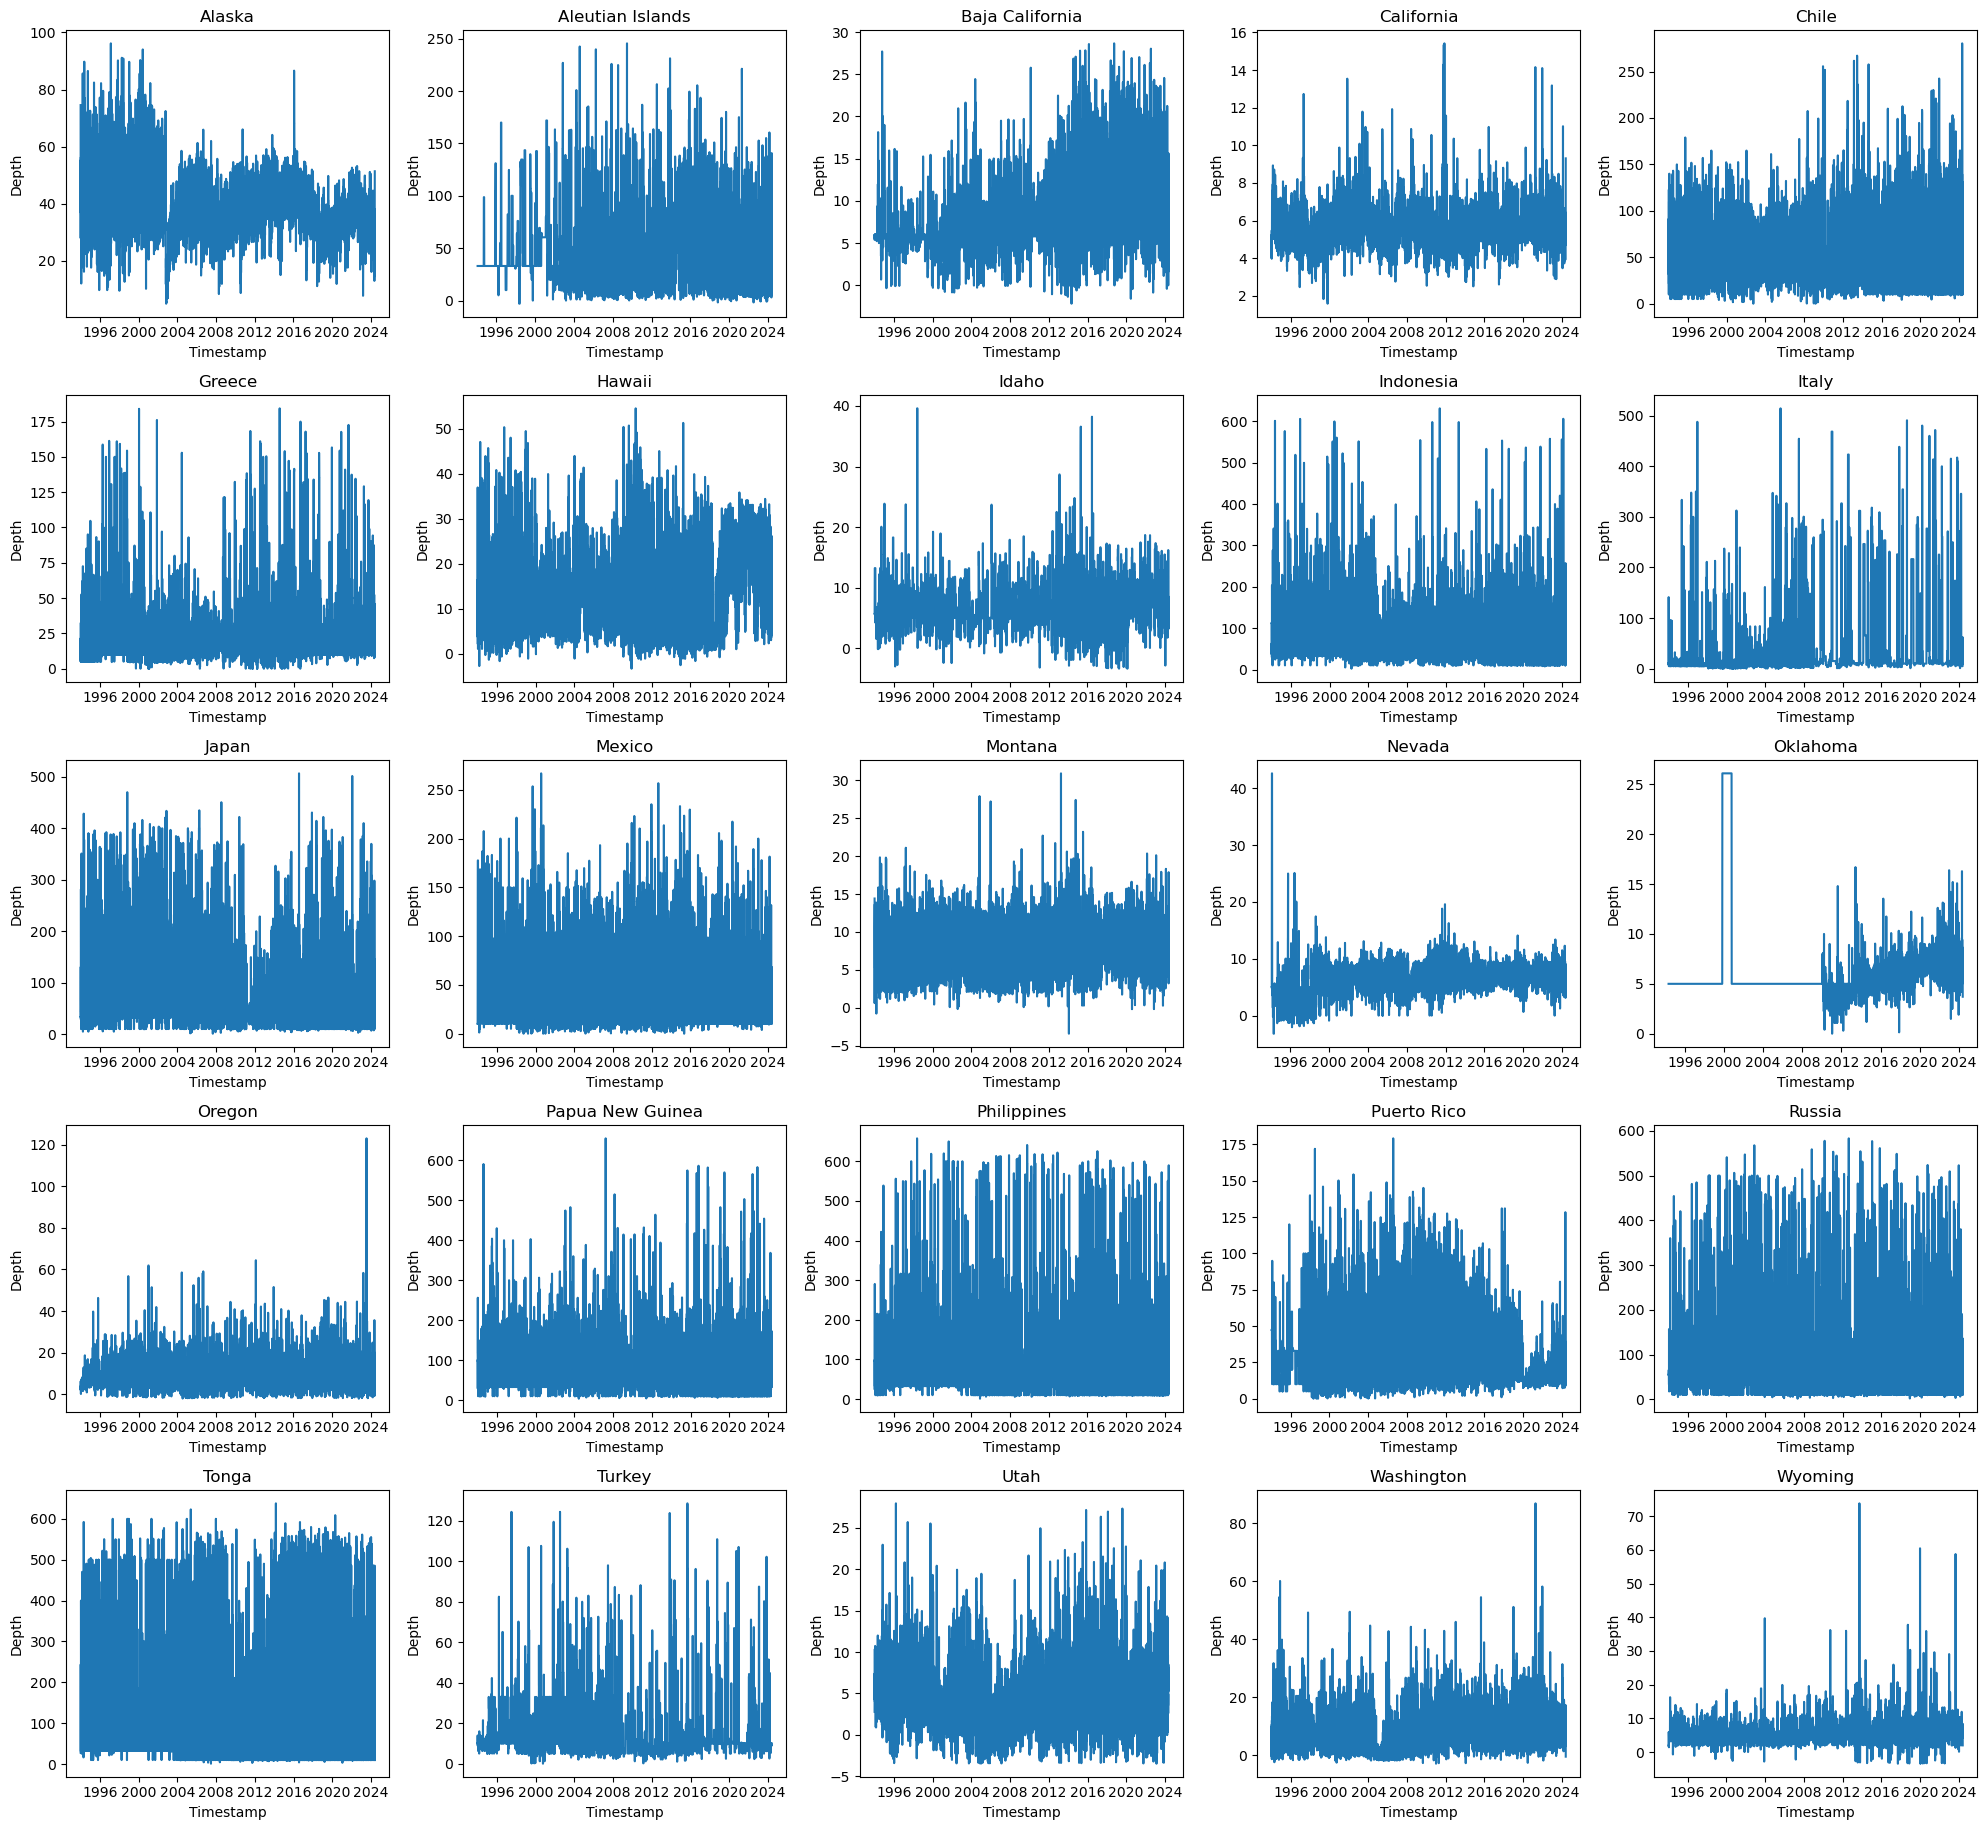

In [16]:
fig, axes = plt.subplots(5, 5, figsize=(20, 20), sharex=False, sharey=False)

regions = df['region'].unique()
for i, ax in enumerate(axes.flat):
    region_data = df[df['region'] == regions[i]]
    ax.plot(region_data['time'], region_data['depth'])
    ax.set_title(regions[i])
    ax.set_xlabel('Timestamp')
    ax.set_ylabel('Depth')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

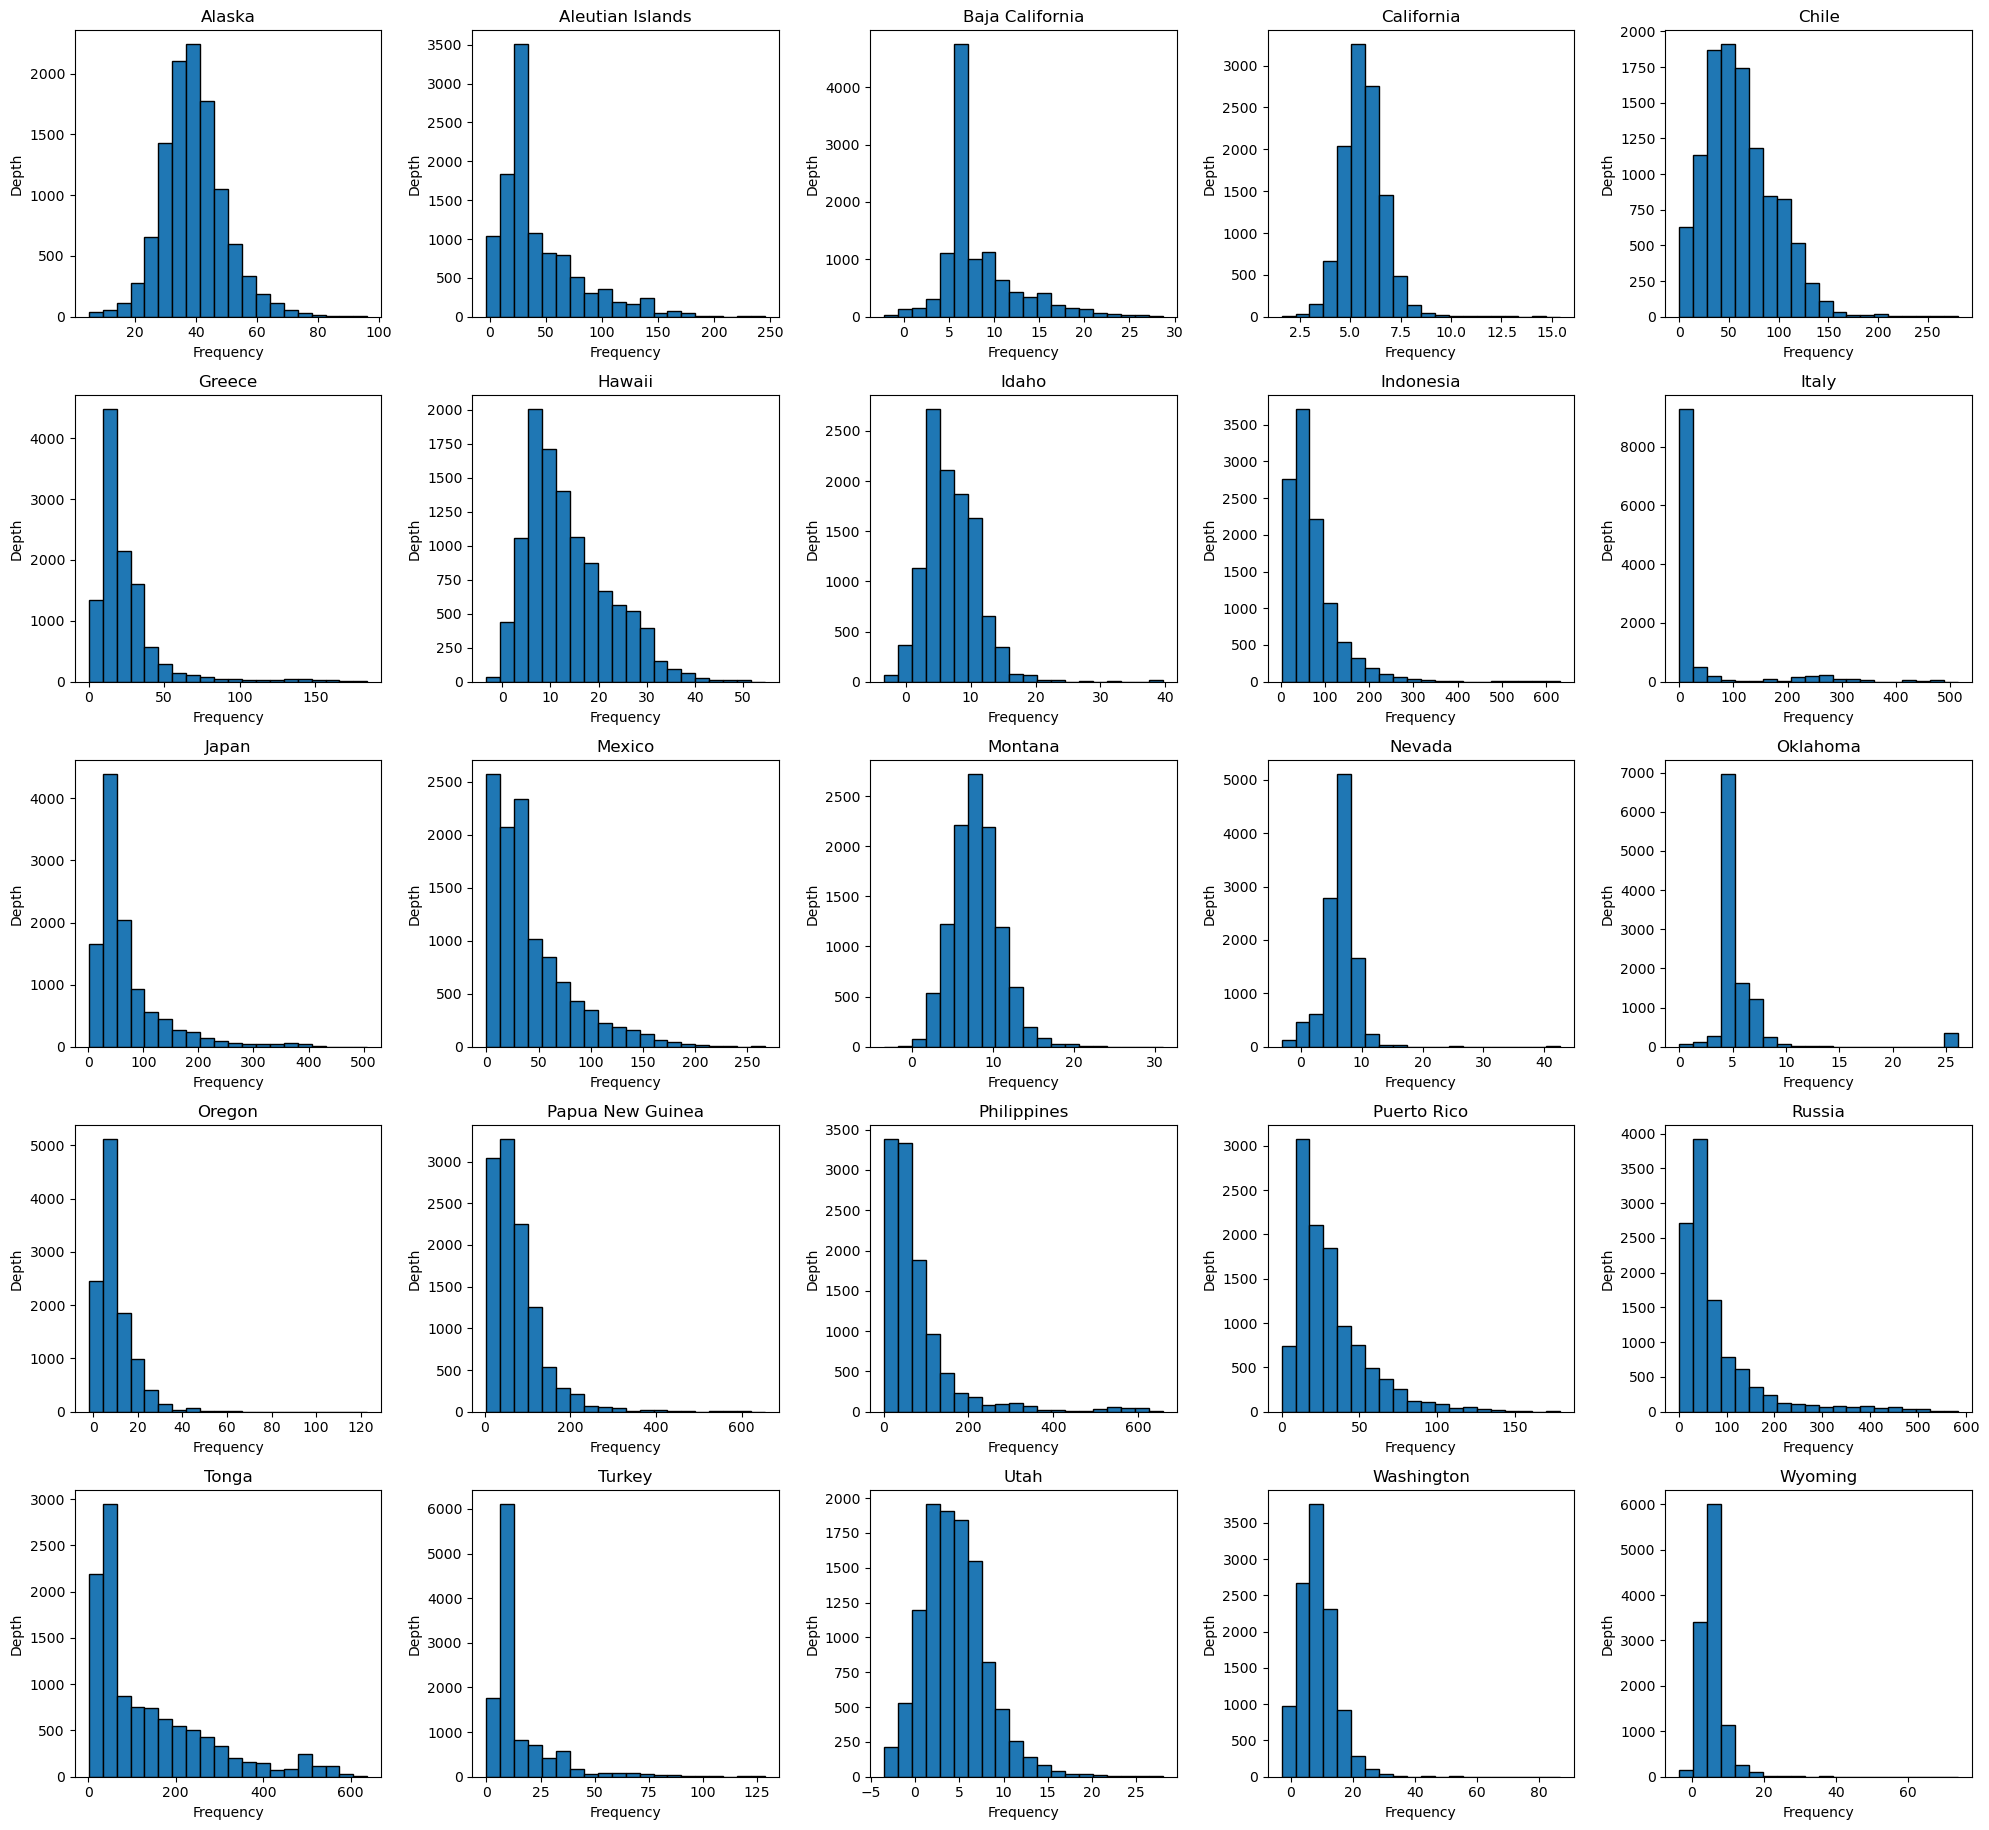

In [20]:
fig, axes = plt.subplots(5, 5, figsize=(20, 20), sharex=False, sharey=False)

regions = df['region'].unique()
for i, ax in enumerate(axes.flat):
    region_data = df[df['region'] == regions[i]]
    ax.hist(region_data['depth'], bins=20, edgecolor='black')
    ax.set_title(regions[i])
    ax.set_xlabel('Frequency')
    ax.set_ylabel('Depth')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

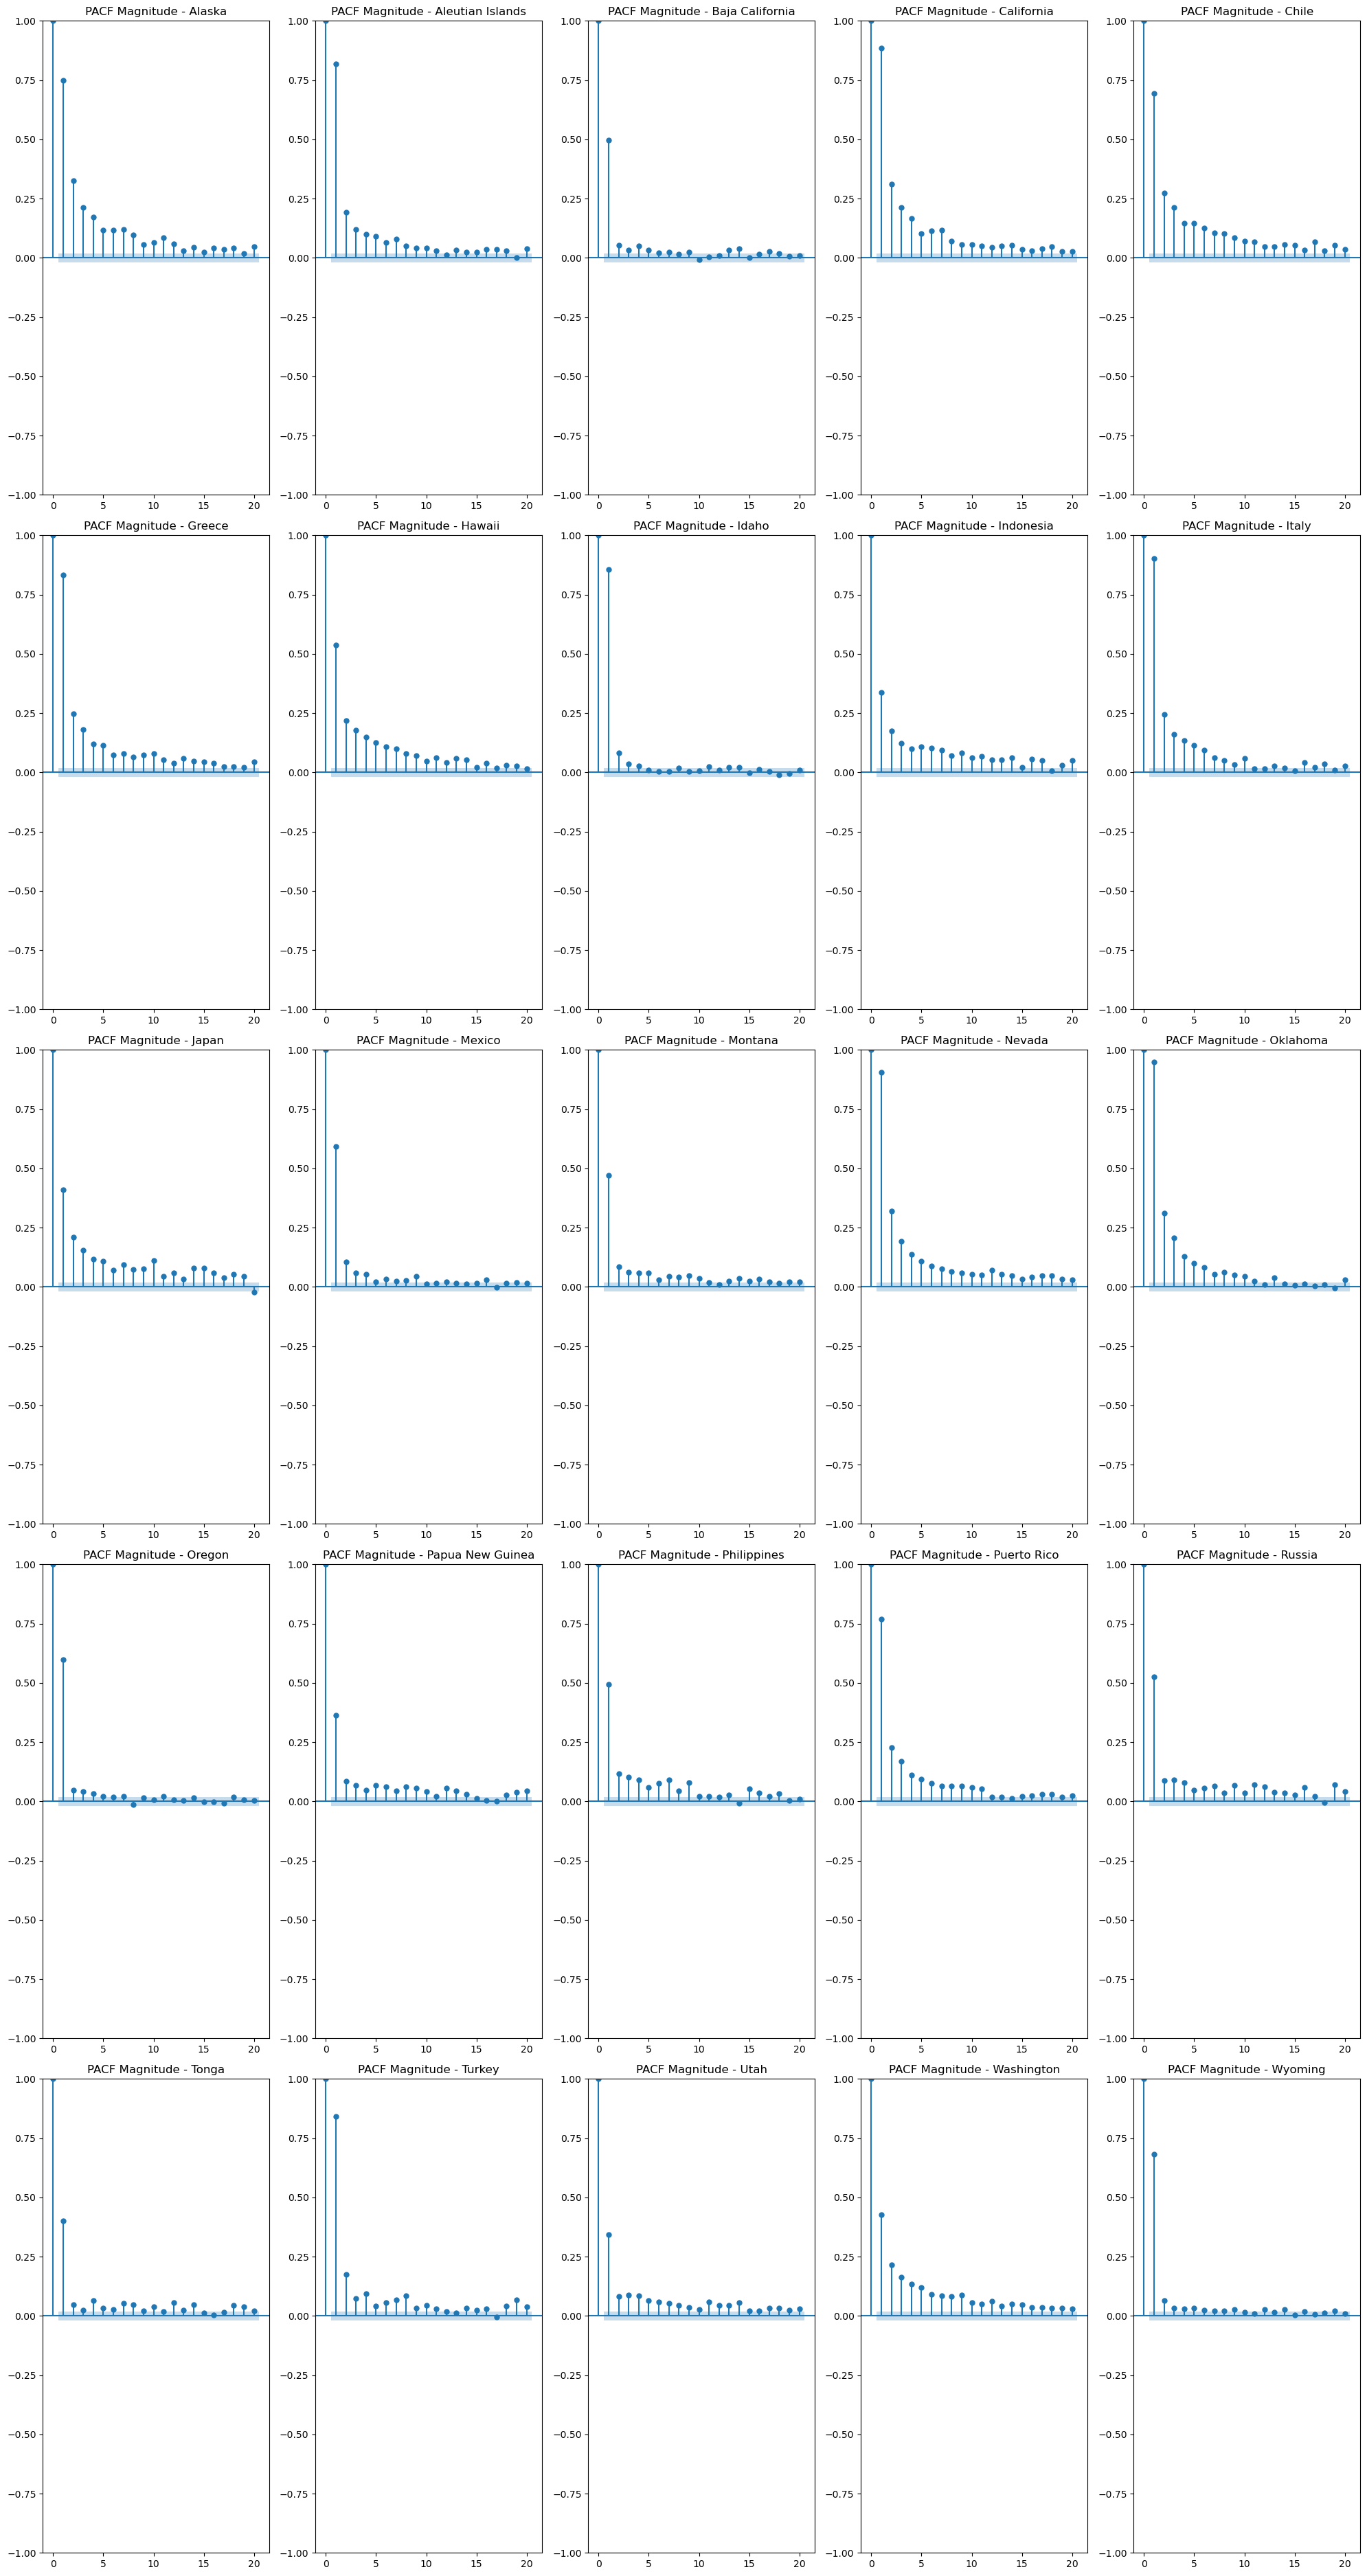

In [42]:
fig, axes = plt.subplots(5, 5, figsize=(20, 40), sharex=False, sharey=False)

regions = df['region'].unique()
for i, ax in enumerate(axes.flat):
    region_data = df[df['region'] == regions[i]]['mag']
    plot_pacf(region_data, lags=20, ax=ax, title=f'PACF Magnitude - {regions[i]}')

plt.tight_layout(rect=[0, 0.03, 1, 0.97])
plt.show()

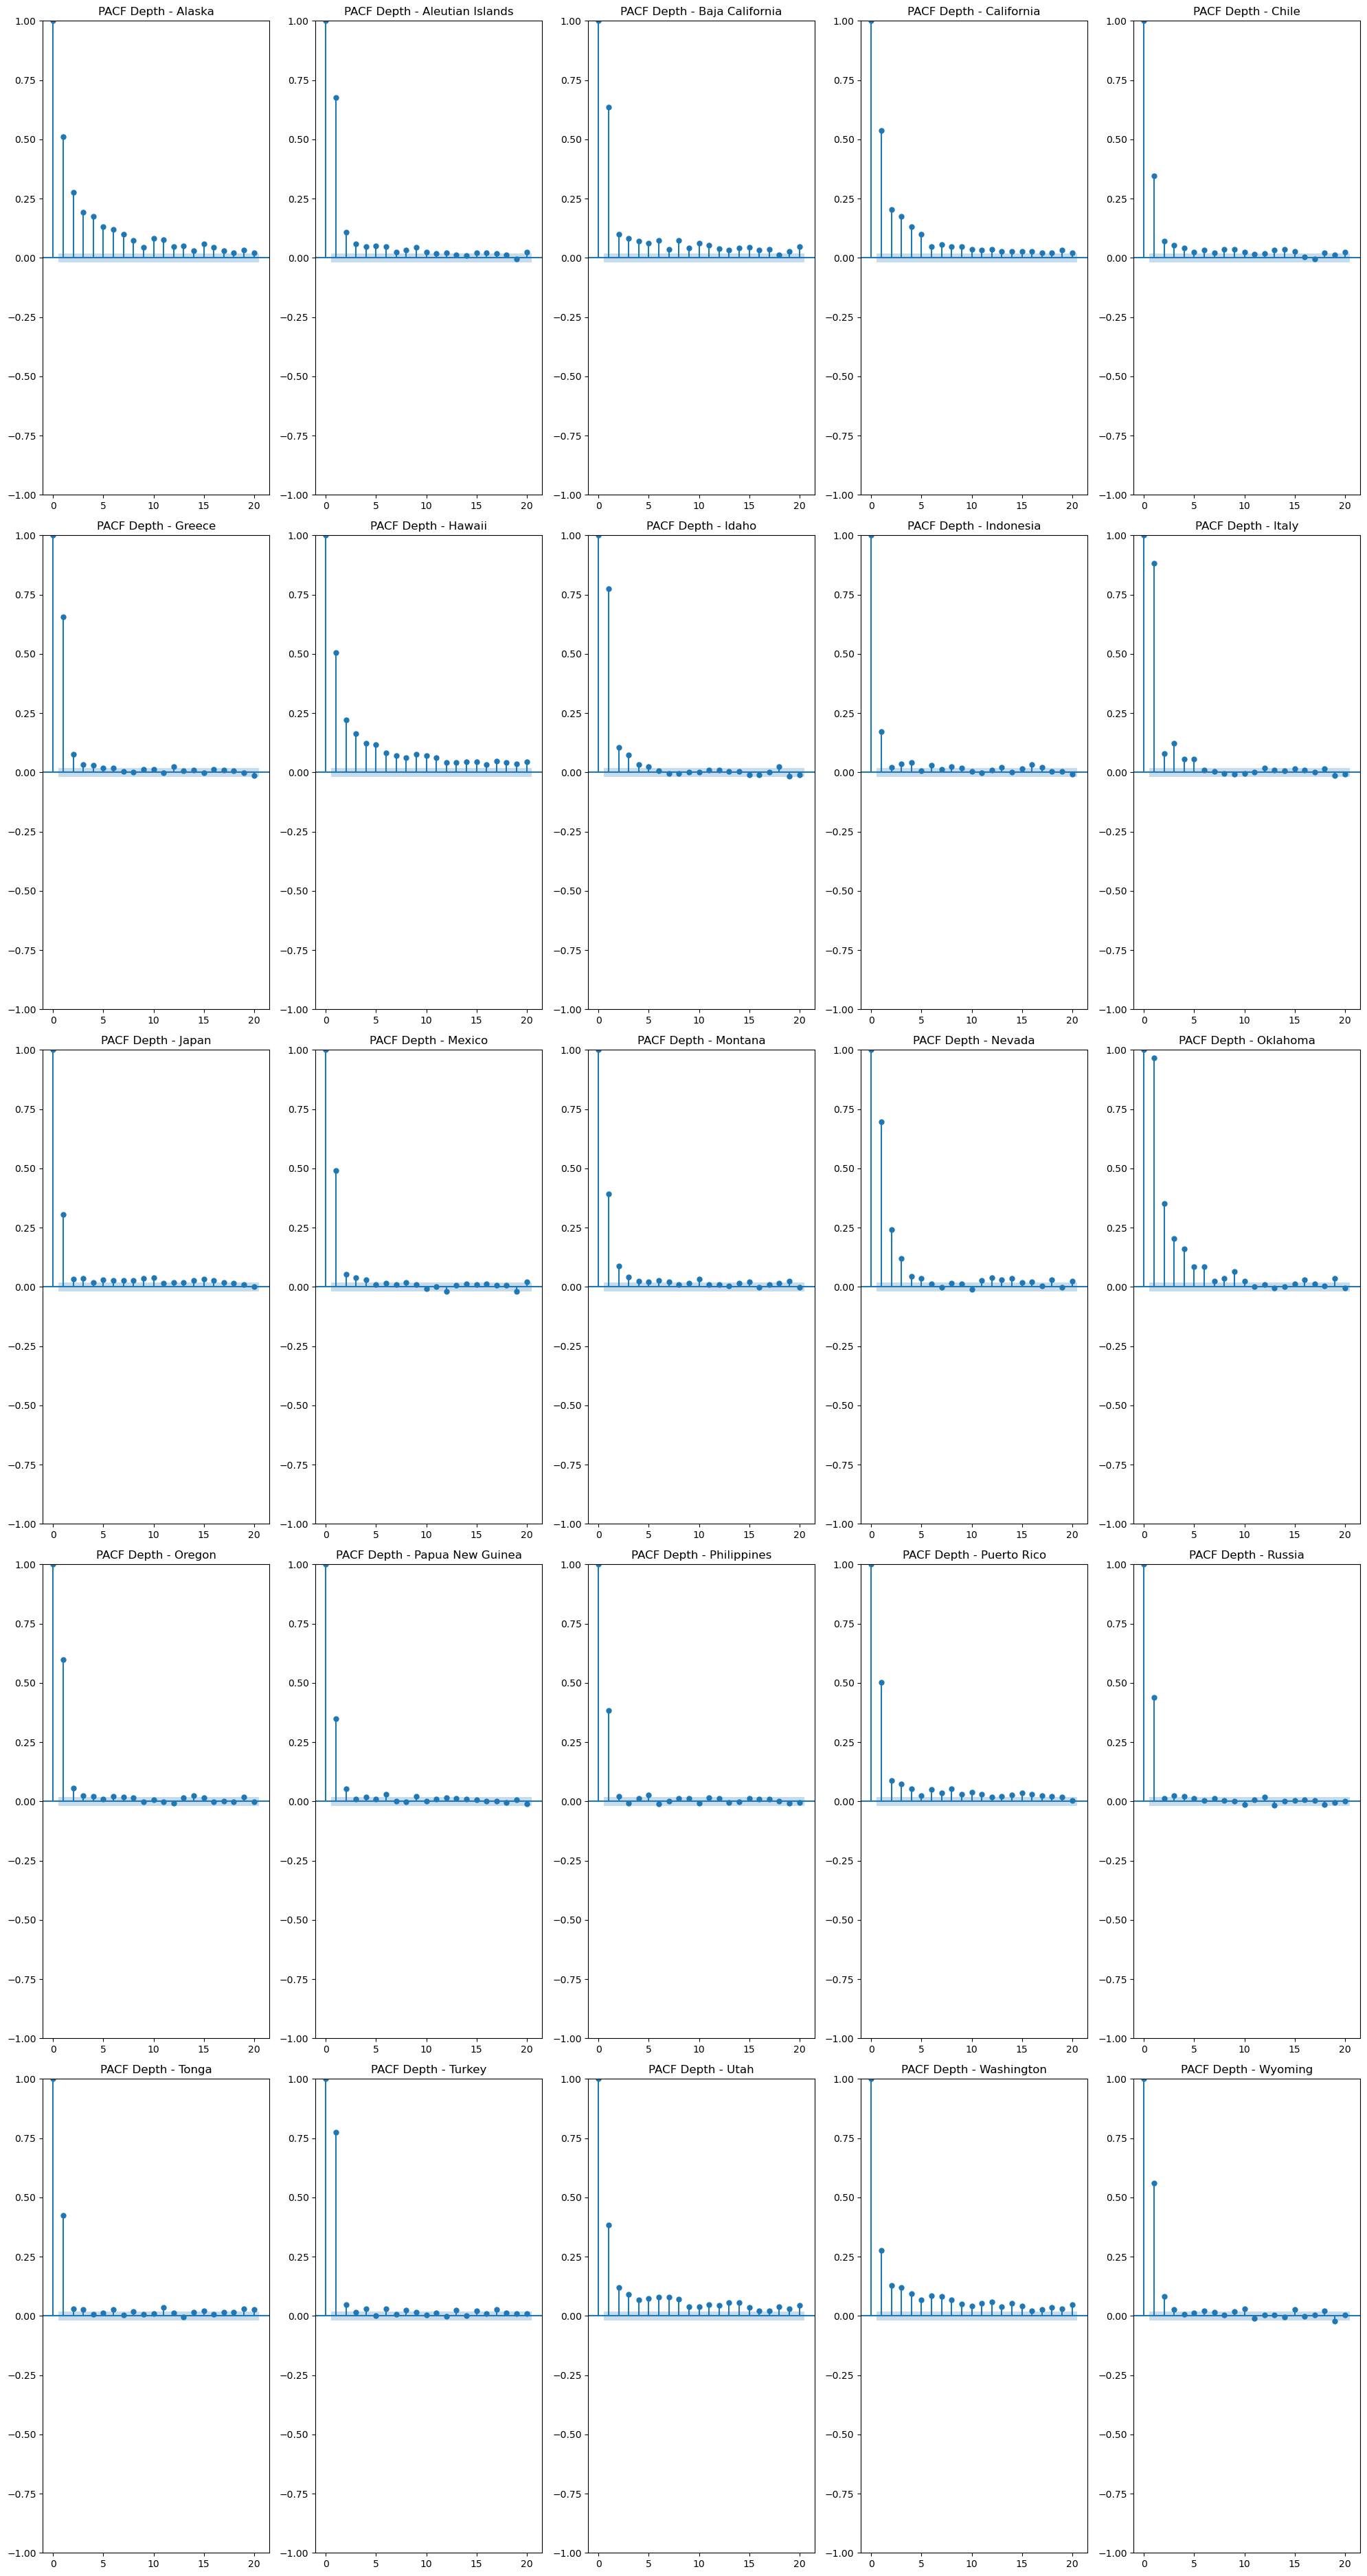

In [44]:
fig, axes = plt.subplots(5, 5, figsize=(20, 40), sharex=False, sharey=False)

regions = df['region'].unique()
for i, ax in enumerate(axes.flat):
    region_data = df[df['region'] == regions[i]]['depth']
    plot_pacf(region_data, lags=20, ax=ax, title=f'PACF Depth - {regions[i]}')

plt.tight_layout(rect=[0, 0.03, 1, 0.97])
plt.show()

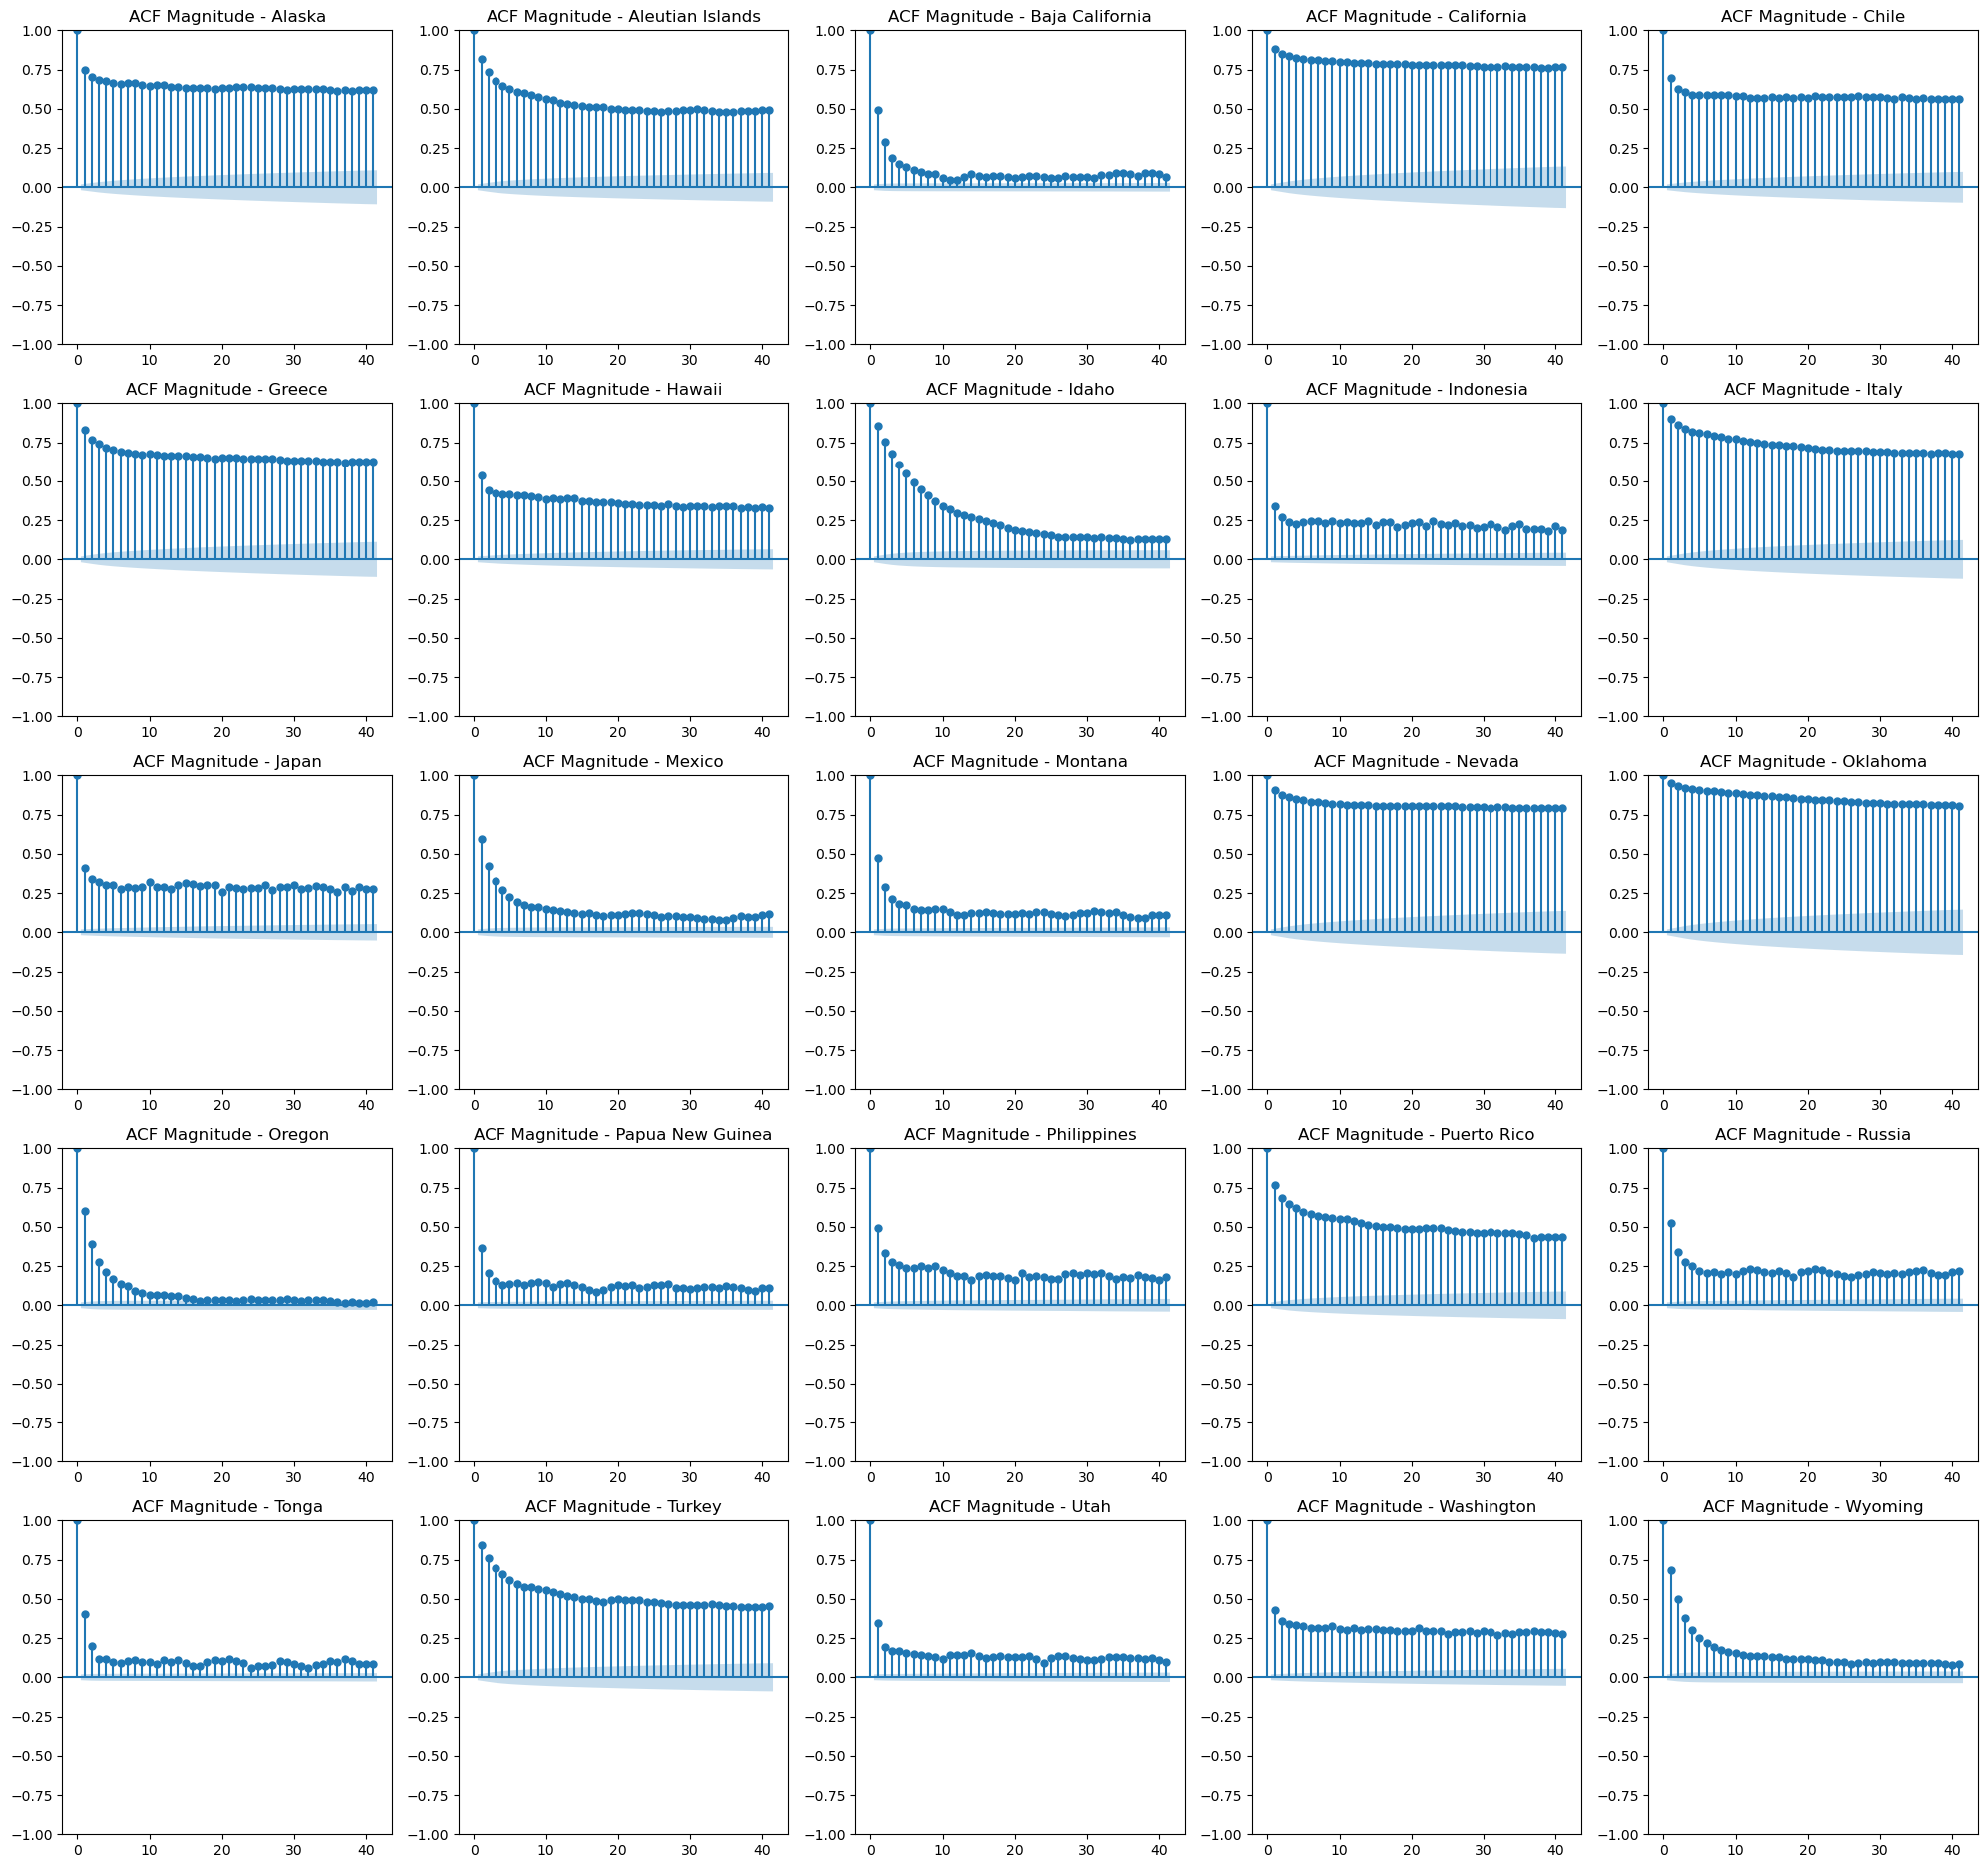

In [45]:
fig, axes = plt.subplots(5, 5, figsize=(20, 20), sharex=False, sharey=False)

for i, ax in enumerate(axes.flat):
    region_data = df[df['region'] == regions[i]]['mag']
    plot_acf(region_data, ax=ax, title=f'ACF Magnitude - {regions[i]}')

plt.tight_layout(rect=[0, 0.03, 1, 0.97])
plt.show()

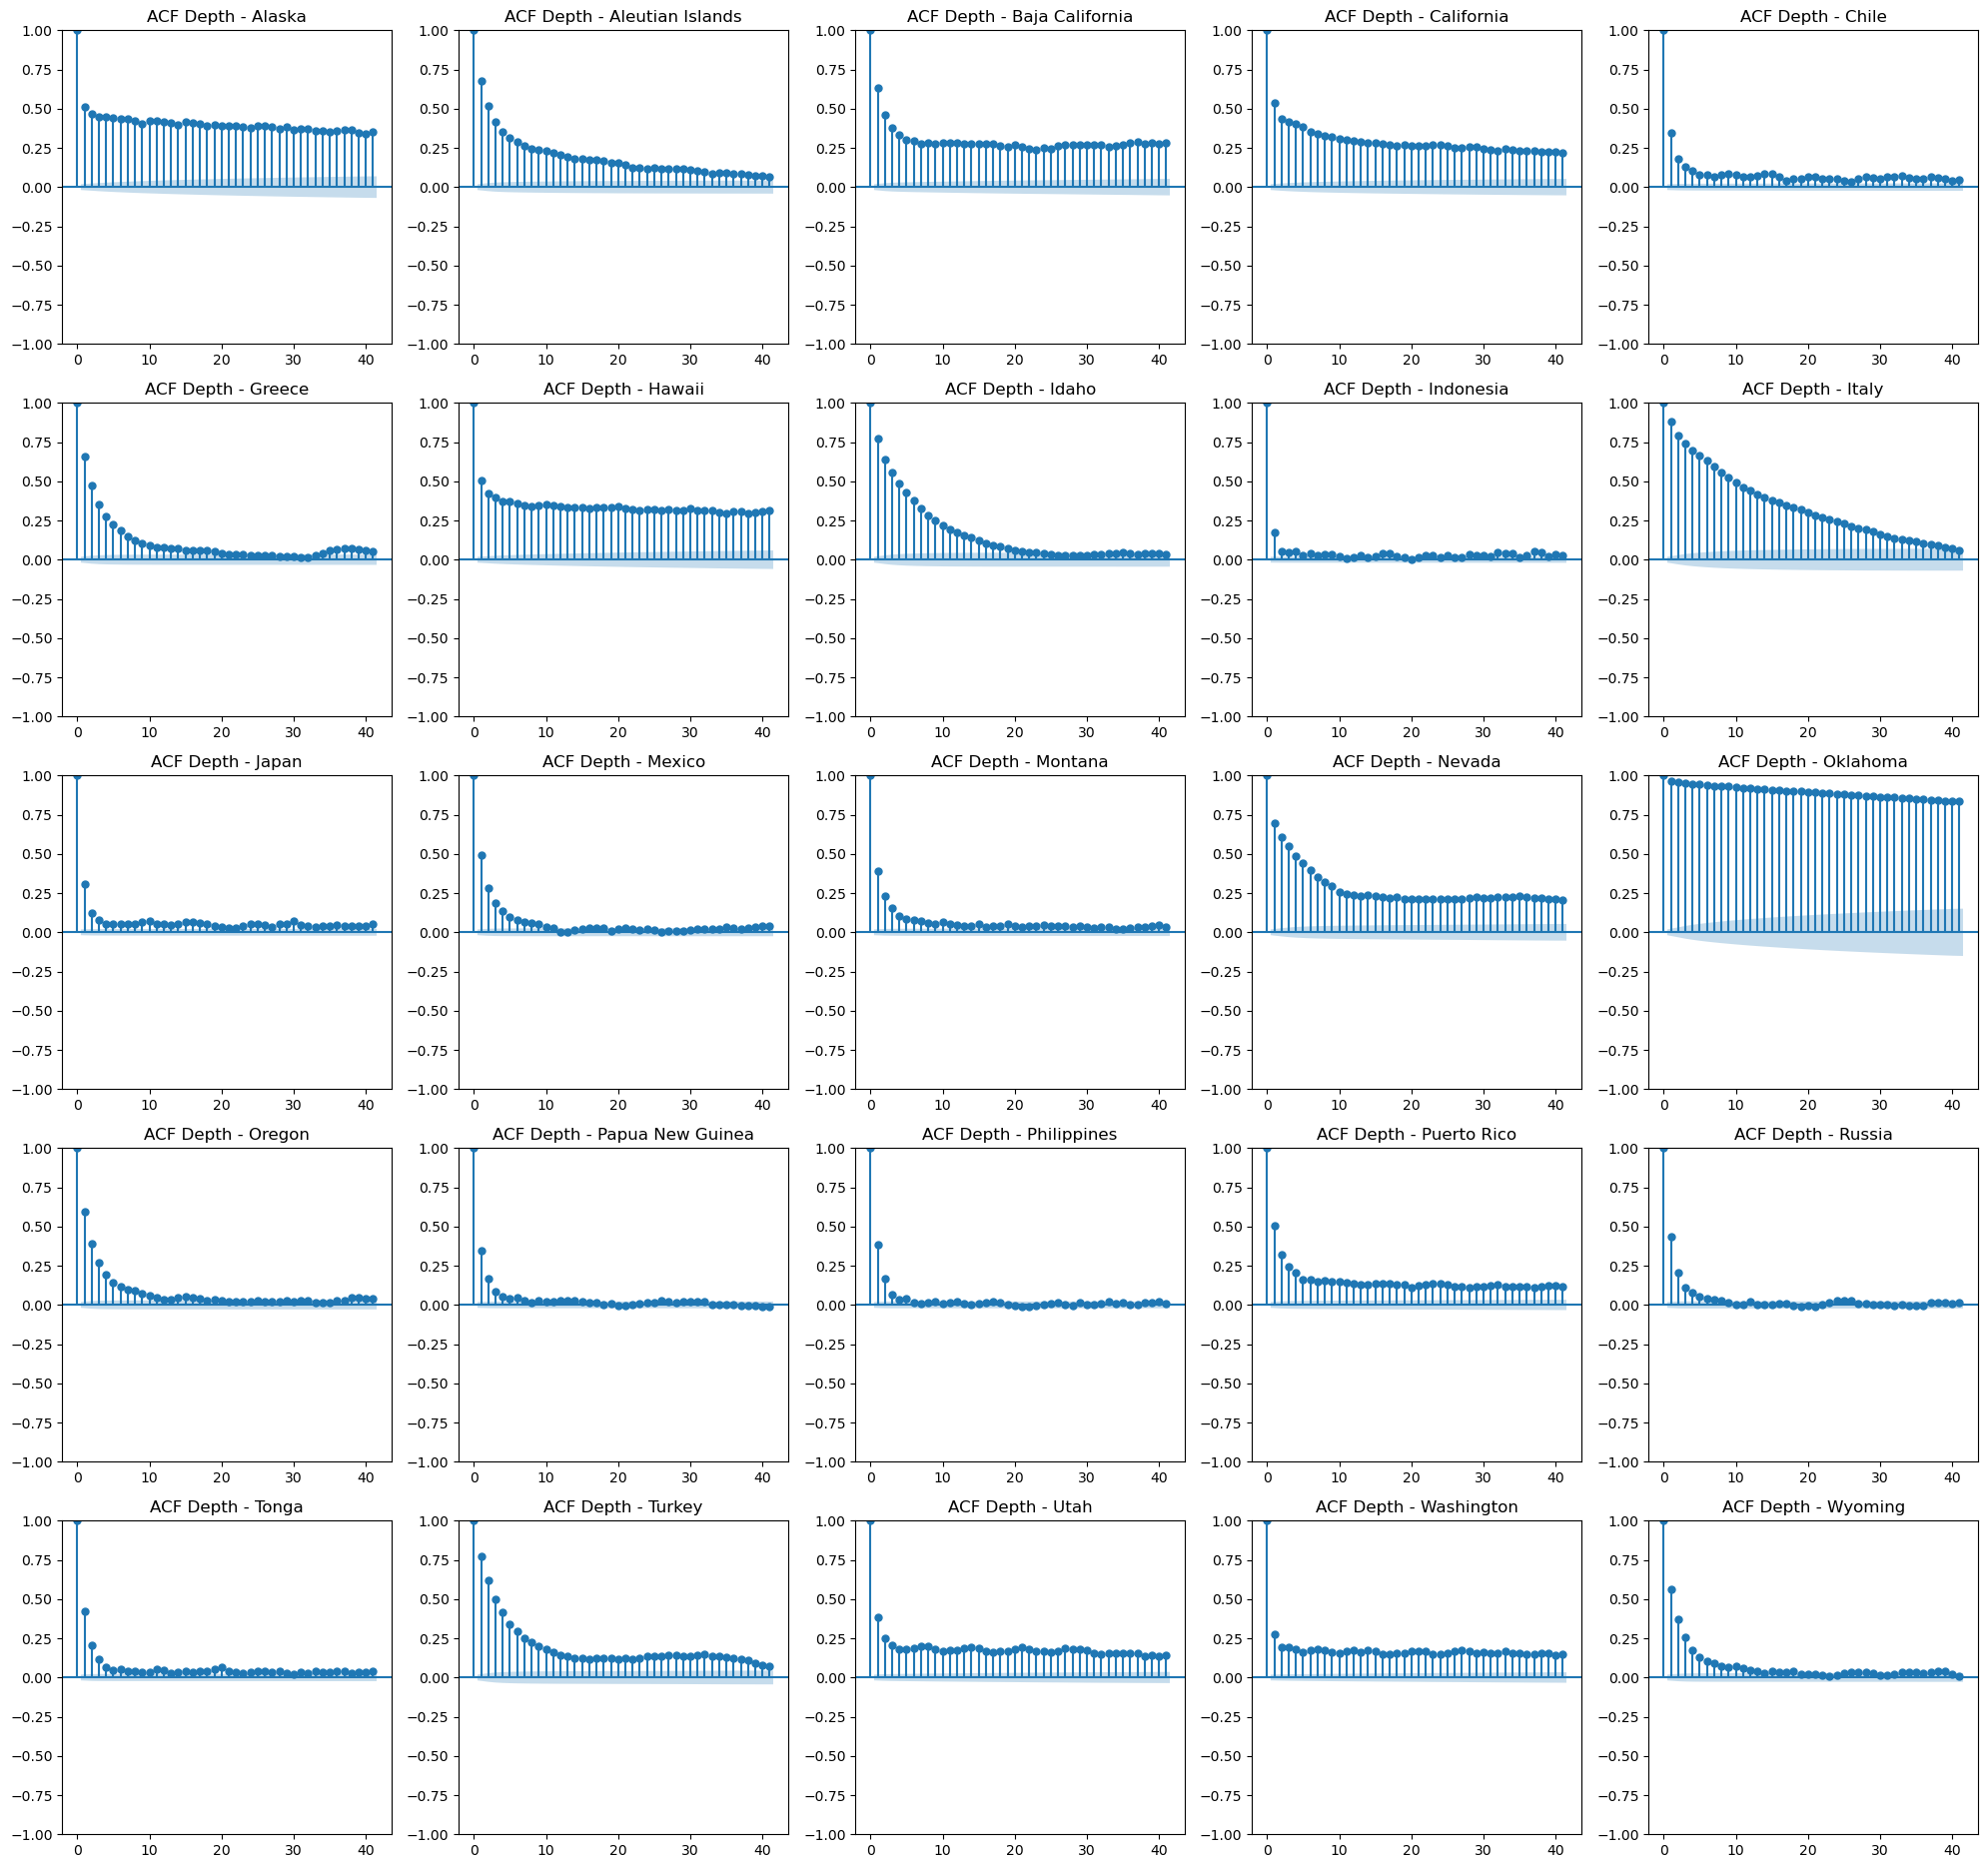

In [47]:
fig, axes = plt.subplots(5, 5, figsize=(20, 20), sharex=False, sharey=False)

for i, ax in enumerate(axes.flat):
    region_data = df[df['region'] == regions[i]]['depth']
    plot_acf(region_data, ax=ax, title=f'ACF Depth - {regions[i]}')

plt.tight_layout(rect=[0, 0.03, 1, 0.97])
plt.show()